In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_3d = pd.read_hdf("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/routine2/data/3D_data/all_data_routine1.h5", key="df")
df_3d

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
0,0.300000,0.000000,0.000000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
1,0.300000,0.000000,0.062832,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,0.300000,0.000000,0.125664,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.300000,0.000000,0.188496,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
4,0.300000,0.000000,0.251327,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64600896,0.000052,1.573296,6.031858,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,1.456307e-07,...,2.624713e-10,0.0,0.0,0.0,-0.0,-0.0,0.0,-8.924000e-08,-3.475668e-07,0.0
64600897,0.000052,1.573296,6.094690,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,1.112814e-07,...,1.511192e-10,0.0,0.0,0.0,-0.0,-0.0,0.0,-6.724000e-08,-3.524844e-07,0.0
64600898,0.000052,1.573296,6.157522,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,7.517719e-08,...,0.000000e+00,0.0,0.0,0.0,-0.0,-0.0,0.0,-4.497464e-08,-3.560109e-07,0.0
64600899,0.000052,1.573296,6.220353,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,3.788735e-08,...,0.000000e+00,0.0,0.0,0.0,-0.0,-0.0,0.0,-2.253178e-08,-3.581324e-07,0.0


In [3]:
kerrm = 1
kerra = 0.8
r_s = 0.5 * np.sqrt(kerrm**2 - kerra**2)
rad_arr = np.sort(df_3d.r.unique())
theta_arr = np.sort(df_3d.theta.unique())
phi_arr = np.sort(df_3d.phi.unique())
idx_point_map = {
    (r, theta, phi): index
    for index, (r, theta, phi) in enumerate(zip(df_3d["r"], df_3d["theta"], df_3d["phi"]))
}

In [10]:
print(phi_arr[50])
print(phi_arr)
print(len(phi_arr))
print(phi_arr[-1])

3.1415926535897936
[0.         0.06283185 0.12566371 0.18849556 0.25132741 0.31415927
 0.37699112 0.43982297 0.50265482 0.56548668 0.62831853 0.69115038
 0.75398224 0.81681409 0.87964594 0.9424778  1.00530965 1.0681415
 1.13097336 1.19380521 1.25663706 1.31946891 1.38230077 1.44513262
 1.50796447 1.57079633 1.63362818 1.69646003 1.75929189 1.82212374
 1.88495559 1.94778745 2.0106193  2.07345115 2.136283   2.19911486
 2.26194671 2.32477856 2.38761042 2.45044227 2.51327412 2.57610598
 2.63893783 2.70176968 2.76460154 2.82743339 2.89026524 2.95309709
 3.01592895 3.0787608  3.14159265 3.20442451 3.26725636 3.33008821
 3.39292007 3.45575192 3.51858377 3.58141563 3.64424748 3.70707933
 3.76991118 3.83274304 3.89557489 3.95840674 4.0212386  4.08407045
 4.1469023  4.20973416 4.27256601 4.33539786 4.39822972 4.46106157
 4.52389342 4.58672527 4.64955713 4.71238898 4.77522083 4.83805269
 4.90088454 4.96371639 5.02654825 5.0893801  5.15221195 5.2150438
 5.27787566 5.34070751 5.40353936 5.46637122 

In [39]:
tmprval = rad_arr[1300]
tmprval

np.float64(84.85210612640368)

In [40]:
df_3d_new_phiplane = df_3d[(df_3d.r ==tmprval) & ((df_3d.theta == dict(df_3d.theta.describe())["50%"]))]
df_3d_new_phiplane = df_3d_new_phiplane.sort_values(by="phi").drop_duplicates()
df_3d_new_phiplane.sort_values(by="phi")
df_3d_new_phiplane
df_3d_new_thetaplane = df_3d[(df_3d.r == tmprval) & (df_3d.phi == dict(df_3d.describe())["phi"]["min"])]
df_3d_new_thetaplane = df_3d_new_thetaplane.sort_values(by="theta").drop_duplicates()
df_3d_new_thetaplane.sort_values(by=["theta"])
df_3d_new_thetaplane
df_3d_new_xplane = df_3d[((df_3d.theta == dict(df_3d.theta.describe())["50%"])) & (df_3d.phi == dict(df_3d.describe())["phi"]["min"])]
df_3d_new_xplane = df_3d_new_xplane.sort_values(by="r").drop_duplicates()
df_3d_new_xplane.sort_values(by=["r"])
df_3d_new_xplane

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
48500700,0.000052,1.570796,0.0,-0.999101,0.0,0.0,0.0,1.000450,1.001799,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-3.590494e-07,0.0
48480500,0.000052,1.570796,0.0,-0.999092,0.0,0.0,0.0,1.000454,1.001817,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-3.626405e-07,0.0
48460300,0.000053,1.570796,0.0,-0.999083,0.0,0.0,0.0,1.000459,1.001835,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-3.662676e-07,0.0
48440100,0.000053,1.570796,0.0,-0.999074,0.0,0.0,0.0,1.000463,1.001853,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-3.699309e-07,0.0
48419900,0.000054,1.570796,0.0,-0.999065,0.0,0.0,0.0,1.000468,1.001872,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-3.736309e-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119500,1668.046118,1.570796,0.0,0.999065,0.0,0.0,0.0,1.000468,1.001872,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.736309e-07,0.0
16139700,1684.729579,1.570796,0.0,0.999074,0.0,0.0,0.0,1.000463,1.001853,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.699309e-07,0.0
16159900,1701.579875,1.570796,0.0,0.999083,0.0,0.0,0.0,1.000459,1.001835,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.662676e-07,0.0
16180100,1718.598674,1.570796,0.0,0.999092,0.0,0.0,0.0,1.000454,1.001817,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.626405e-07,0.0


In [ ]:
for col in list(df_3d.columns)[3:]:
    fig, ax = plt.subplots(figsize=(20,12))
    #ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
    #ax.plot(df_2d_new_xplane["r"], df_2d_new_xplane[col], color='b', label="2d data")
    ax.plot(df_3d_new_phiplane["phi"], df_3d_new_phiplane[col], color='b')
    #ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane[col], color='#644117', linestyle=":", label="interpolated data")
    plt.xlabel("phi")
    plt.ylabel(col)
    plt.title("{} vs phi (r = {}, theta = {})".format(col, df_3d_new_phiplane.r.unique()[0], df_3d_new_phiplane.theta.unique()[0]))
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig("phi_vs_{}_3dv4.png".format(col))

    plt.show()
for col in list(df_3d.columns)[3:]:
    fig, ax = plt.subplots(figsize=(20,12))
    #plt.subplots_adjust(right=0.75)

    #ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
    #ax.plot(df_2d_new_xplane["r"],11 df_2d_new_xplane[col], color='b', label="2d data")
    ax.plot(df_3d_new_thetaplane["theta"], df_3d_new_thetaplane[col], color='b')
    #ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane[col], color='#644117', linestyle=":", label="interpolated data")
    plt.xlabel("theta")
    plt.ylabel(col)
    plt.title("{} vs theta (r = {}, phi = {})".format(col, df_3d_new_thetaplane.r.unique()[0], df_3d_new_thetaplane.phi.unique()[0]))
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig("theta_vs_{}_3dv4.png".format(col))

    plt.show()
for col in list(df_3d.columns)[3:]:
    fig, ax = plt.subplots(figsize=(20,12))
    #plt.subplots_adjust(right=0.75)
    plt.xlim(1e-6, 100)
    plt.xscale('log')
    #ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
    #ax.plot(df_2d_new_xplane["r"], df_2d_new_xplane[col], color='b', label="2d data")
    ax.plot(df_3d_new_xplane["r"], df_3d_new_xplane[col], color='b')
    ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
    #ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane[col], color='#644117', linestyle=":", label="interpolated data")
    plt.xlabel("r")
    plt.ylabel(col)
    plt.title("{} vs r (phi = {}, theta = {})".format(col, df_3d_new_xplane.phi.unique()[0], df_3d_new_xplane.theta.unique()[0]))
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig("r_vs_{}_3dv4.png".format(col))

    plt.show()

In [42]:
import os
import pathlib 
dataframes = []
for f in pathlib.Path("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/routine2/data/processed_grids").glob("*.h5"):
    dataframes.append(str(f))
dataframes = [pd.read_hdf(f, key="df") for f in dataframes]
df_interpolated = pd.concat(dataframes, axis=0, ignore_index=True)
df_interpolated

,x,y,z,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
0,198.401,64.0,396.80,0.996514,-7.486959e-08,0.000000,0.0,1.001747,1.007005,-5.706142e-07,...,4.651490e-09,5.039988e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204.801,64.0,396.80,0.996545,-7.246642e-08,0.000000,0.0,1.001732,1.006943,-5.762363e-07,...,4.594698e-09,4.988840e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,211.201,64.0,396.80,0.996577,-7.007314e-08,0.000000,0.0,1.001716,1.006879,-5.773286e-07,...,4.483238e-09,4.925919e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,217.601,64.0,396.80,0.996581,-6.940522e-08,0.000000,0.0,1.001714,1.006870,-5.863421e-07,...,4.457965e-09,4.980955e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,224.001,64.0,396.80,0.996613,-6.672171e-08,0.000000,0.0,1.001697,1.006805,-6.065165e-07,...,4.511597e-09,4.953708e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511172,1.901,2.1,0.95,0.699242,-7.004584e-03,0.006977,0.0,1.189676,1.960058,-4.762173e-02,...,4.269921e-02,1.339344e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1511173,1.926,2.1,0.95,0.701702,-6.743533e-03,0.006758,0.0,1.187721,1.947214,-4.671408e-02,...,4.143366e-02,1.291901e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1511174,1.951,2.1,0.95,0.701962,-6.724686e-03,0.006734,0.0,1.187514,1.945519,-4.665092e-02,...,4.118945e-02,1.293785e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1511175,1.976,2.1,0.95,0.704024,-6.590764e-03,0.006547,0.0,1.185883,1.934100,-4.581601e-02,...,3.971335e-02,1.281008e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_interpolated_xplane = df_interpolated[
    (df_interpolated.y >= np.float64(-0.0001)) & 
    (df_interpolated.y <= np.float64(0.0001)) & 
    (df_interpolated.z >= np.float64(-0.0001)) & 
    (df_interpolated.z <= np.float64(0.0001))
]

df_interpolated_xplane = df_interpolated_xplane.sort_values(['x', 'y', 'z'])

In [48]:
df_interpolated_xplane

,x,y,z,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z


df_interpolated_xplane

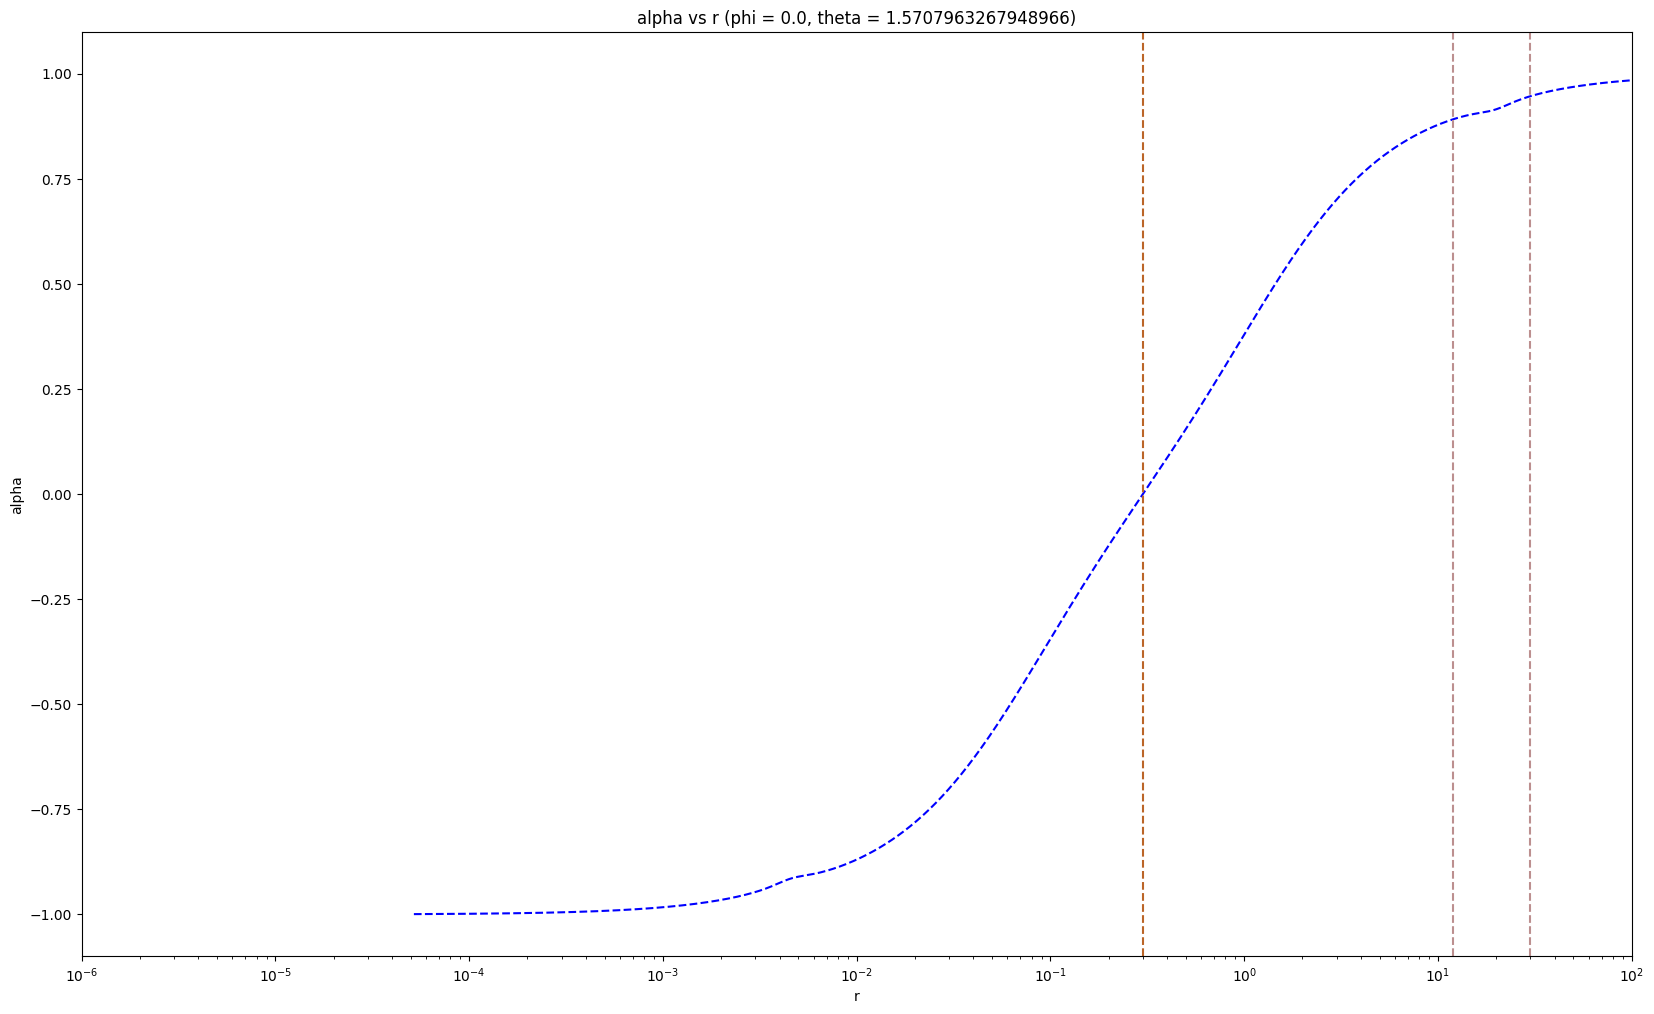

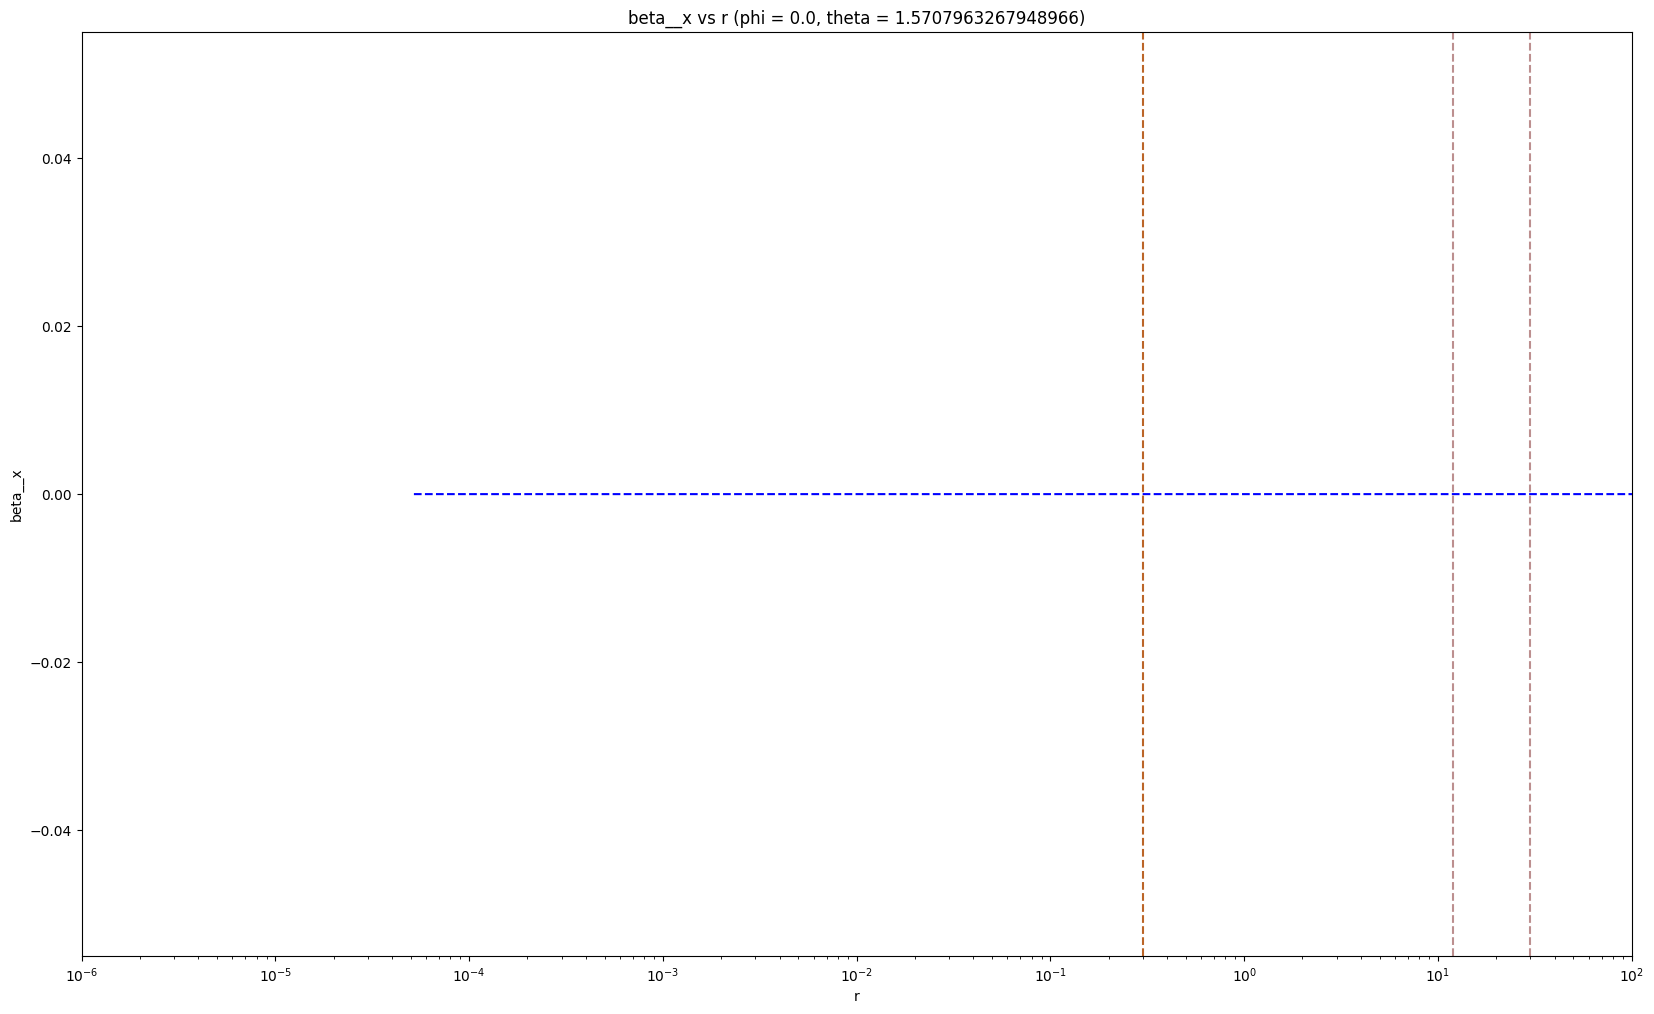

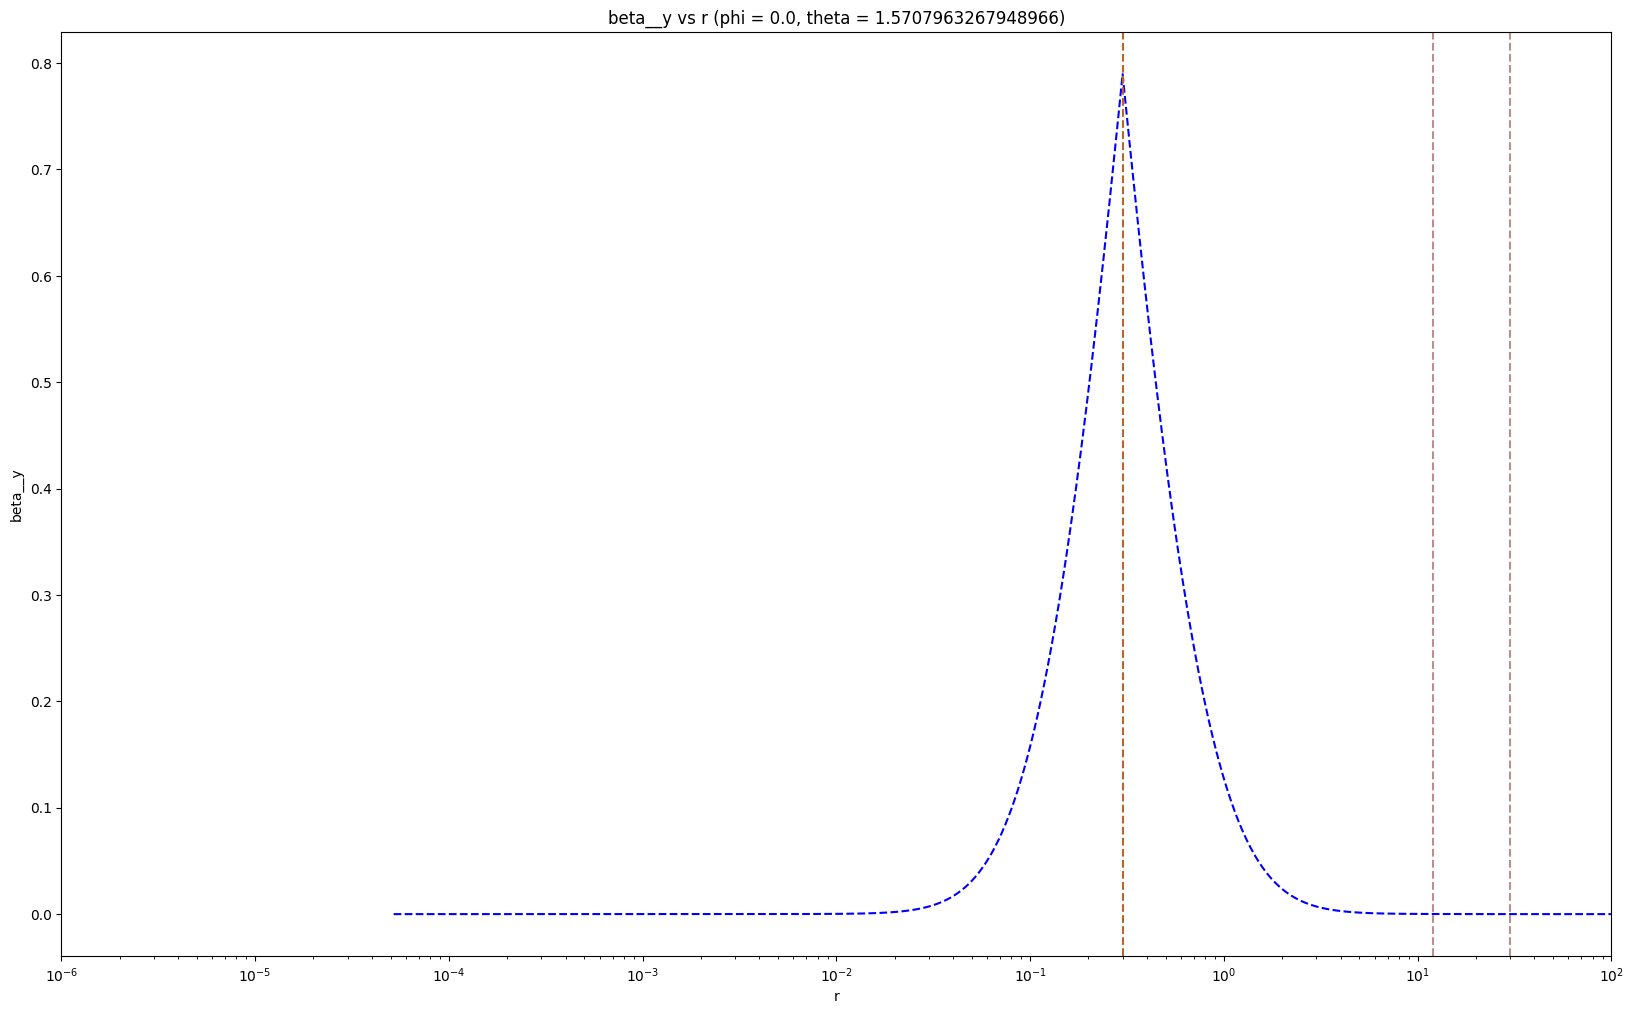

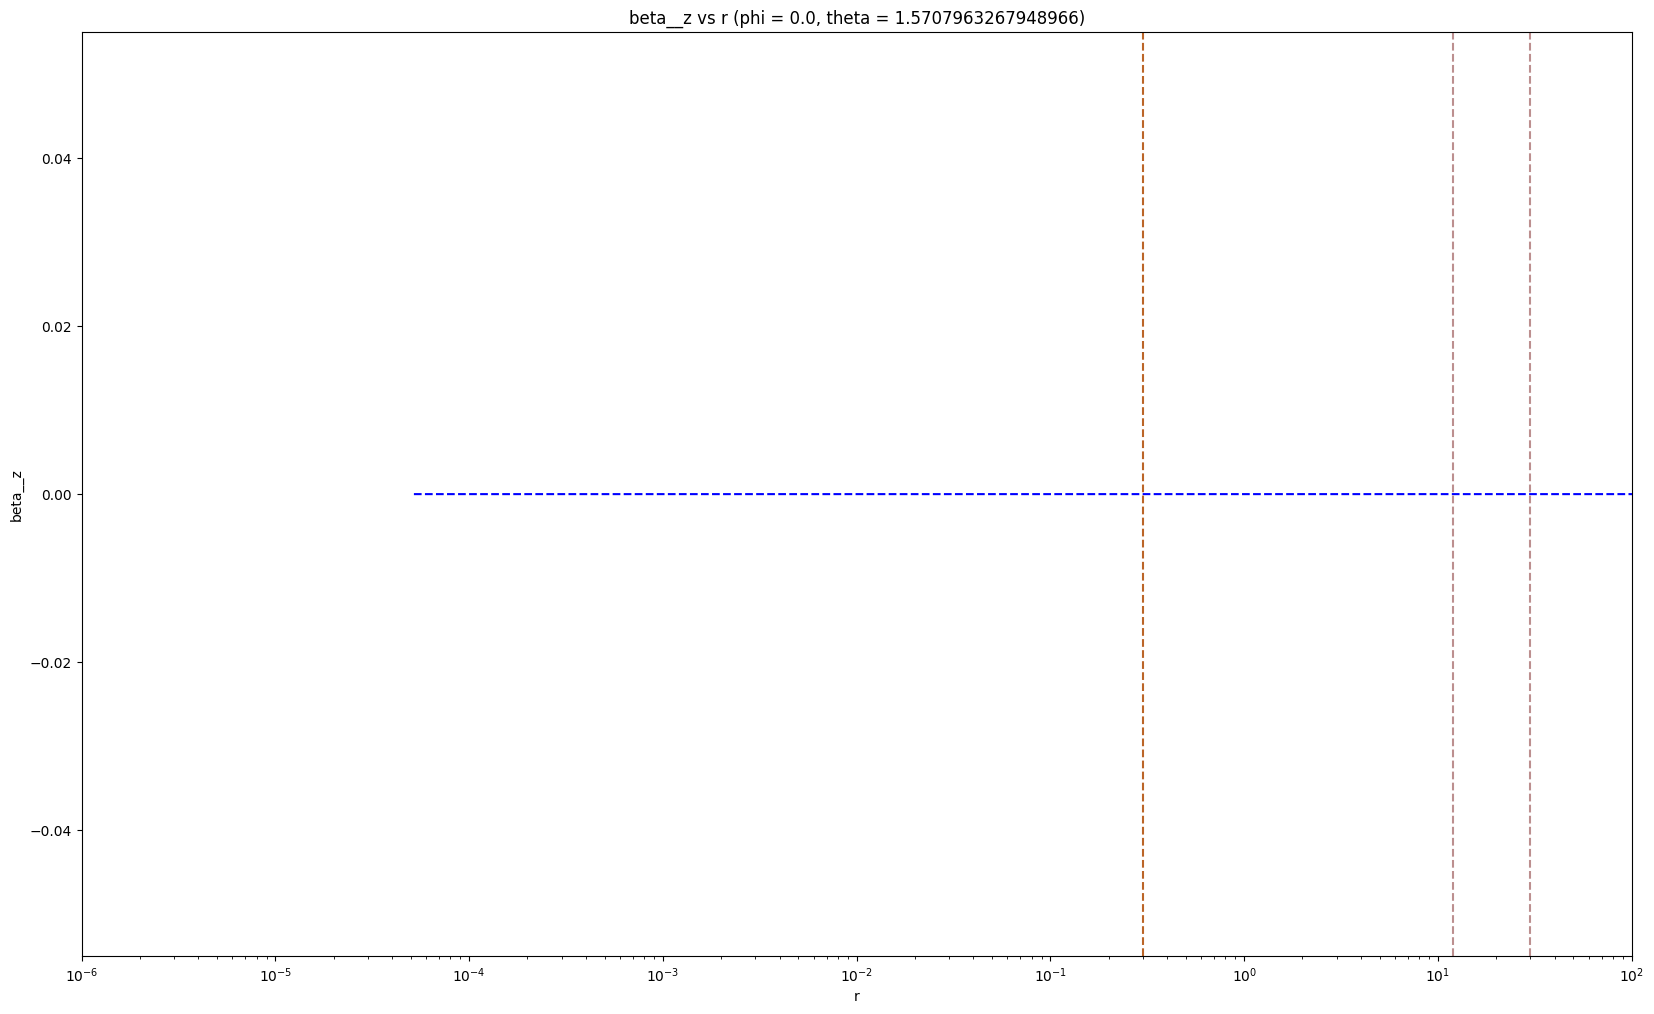

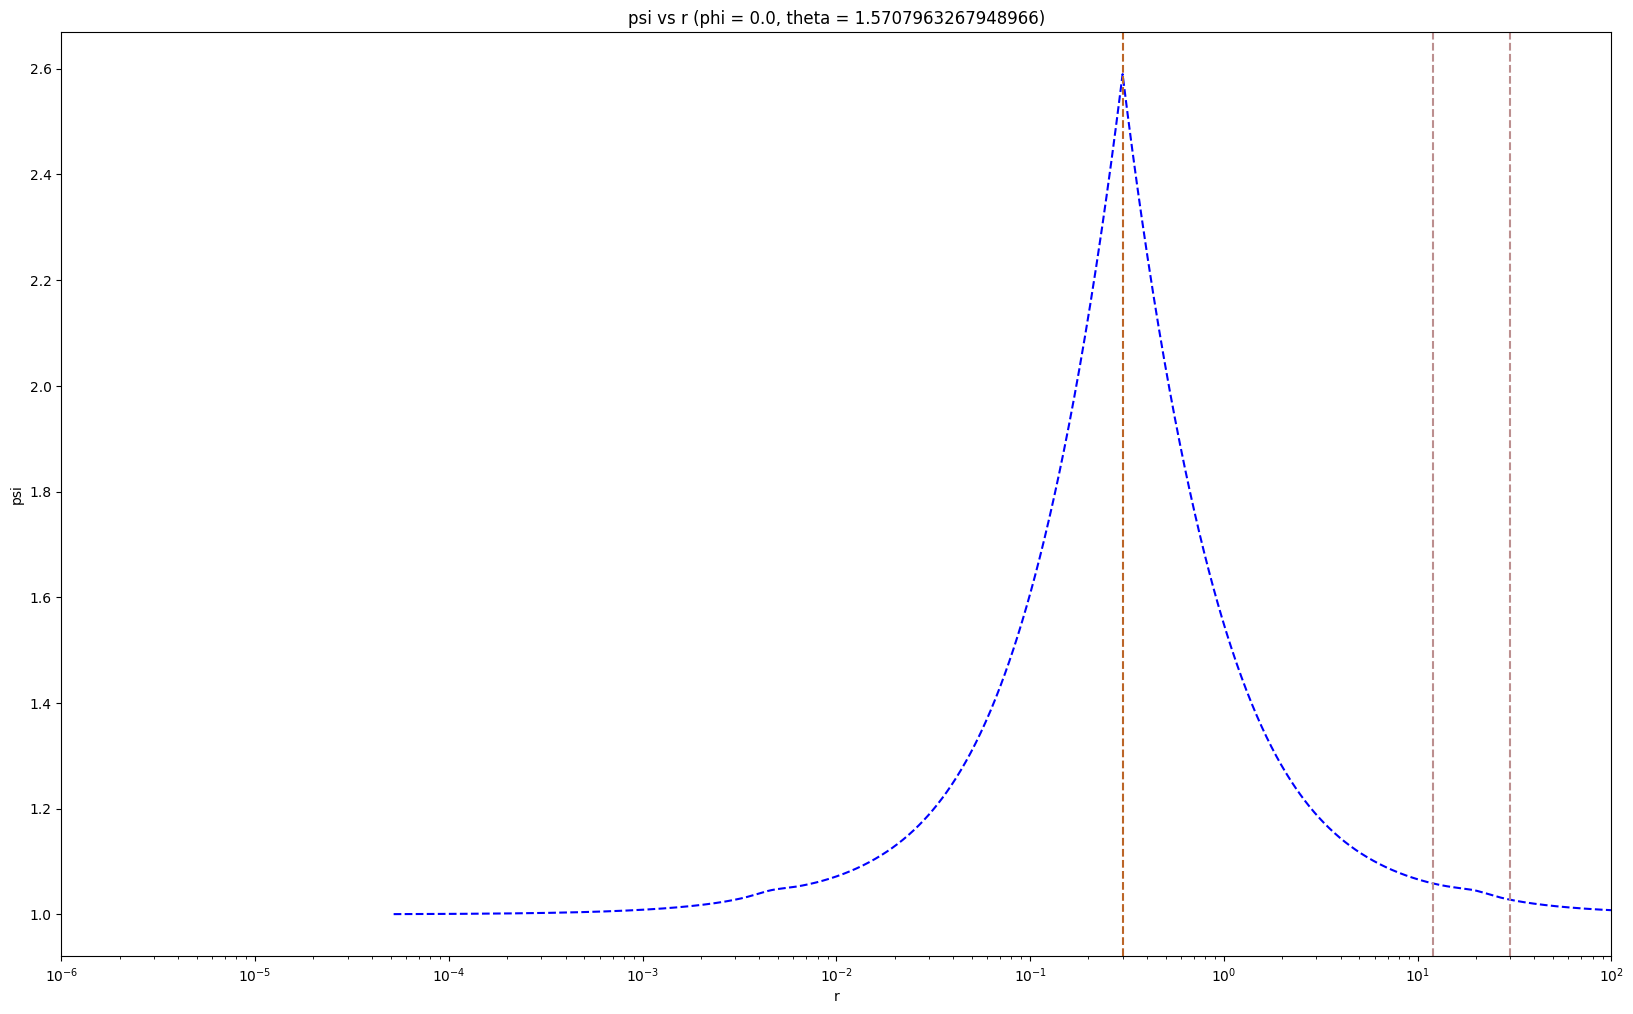

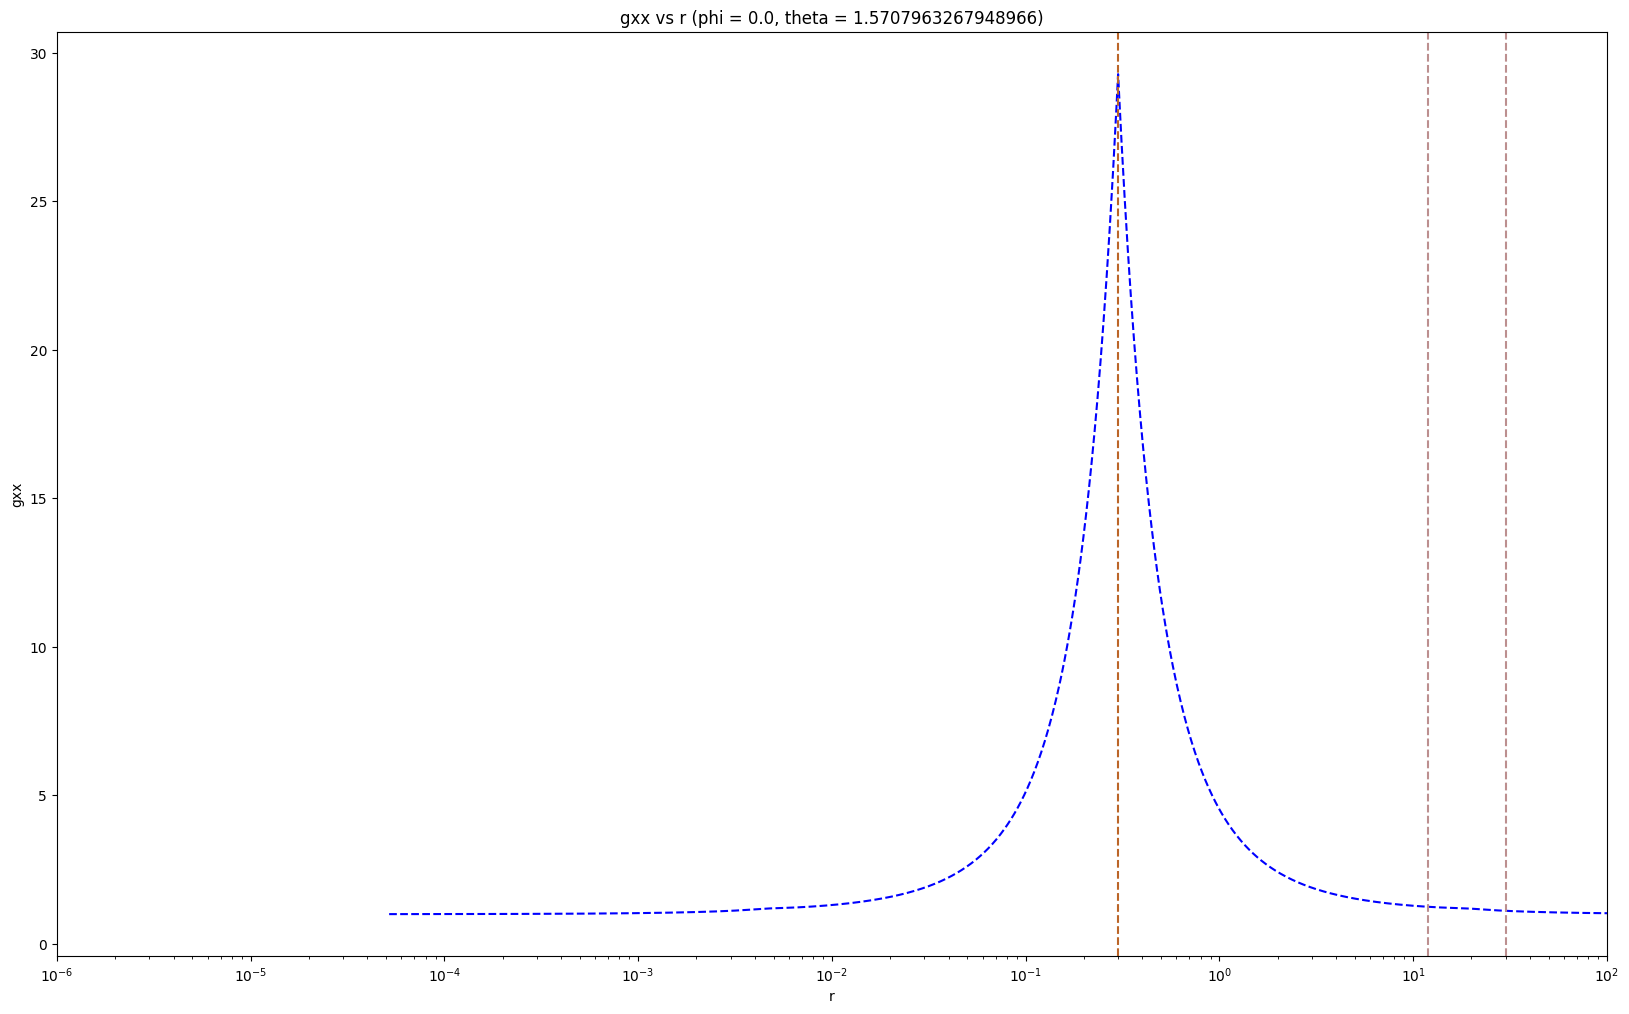

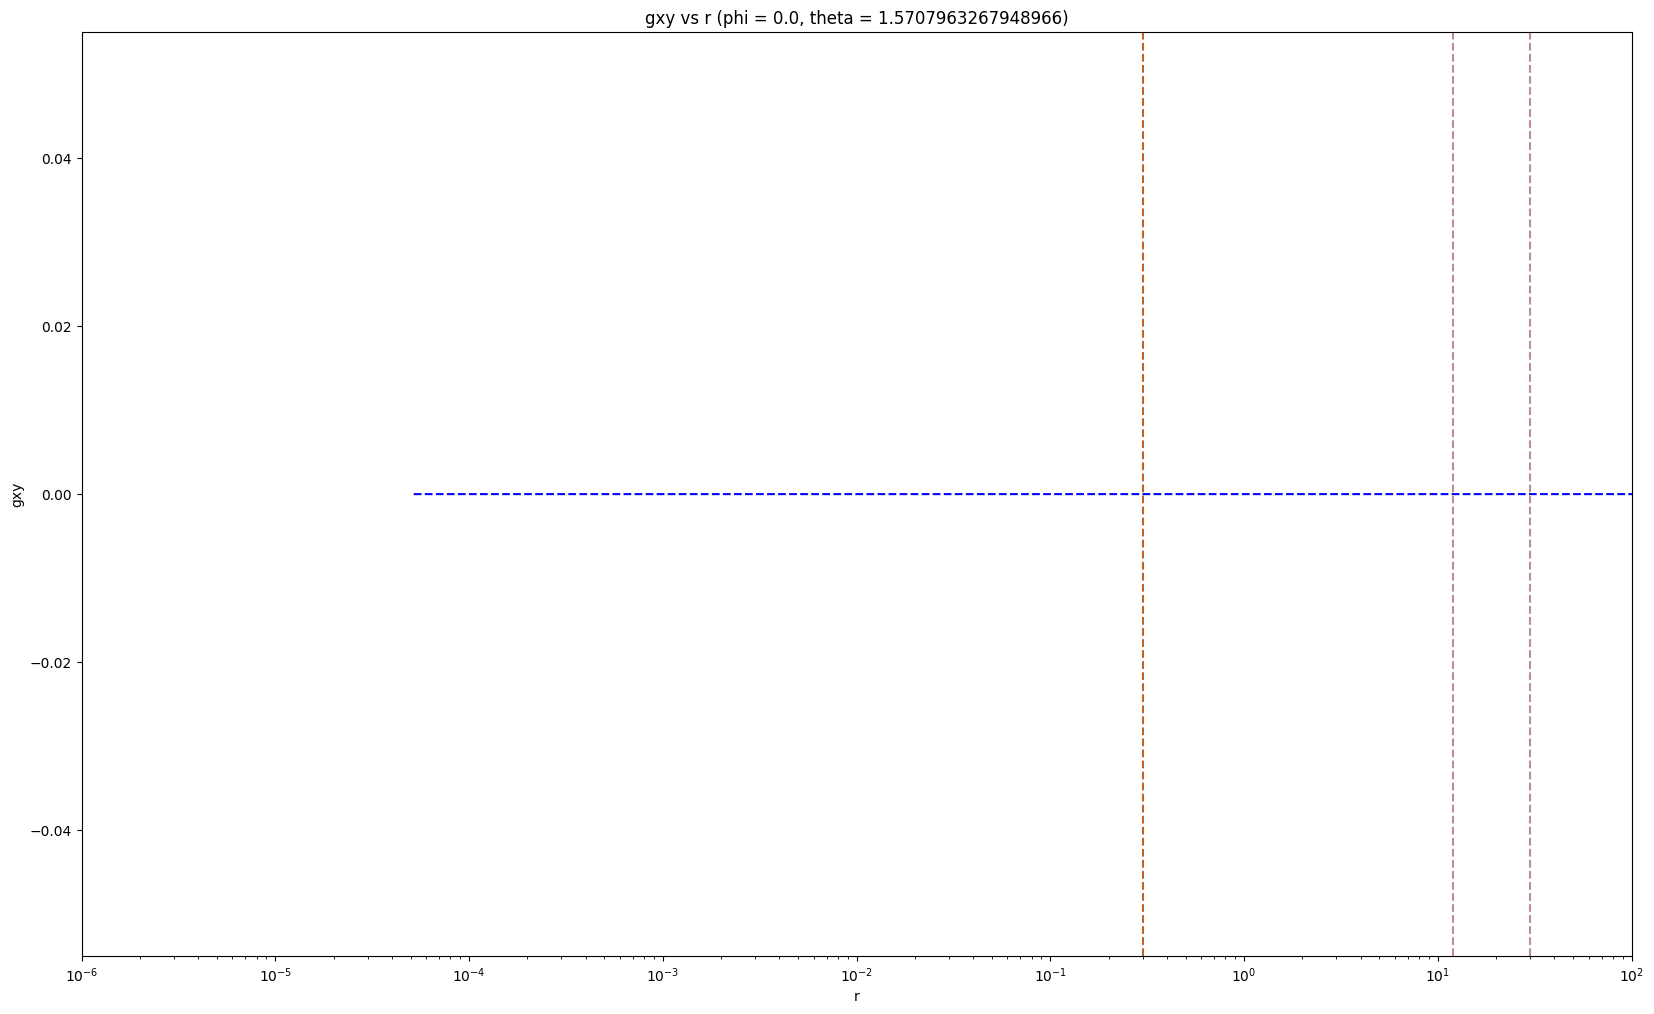

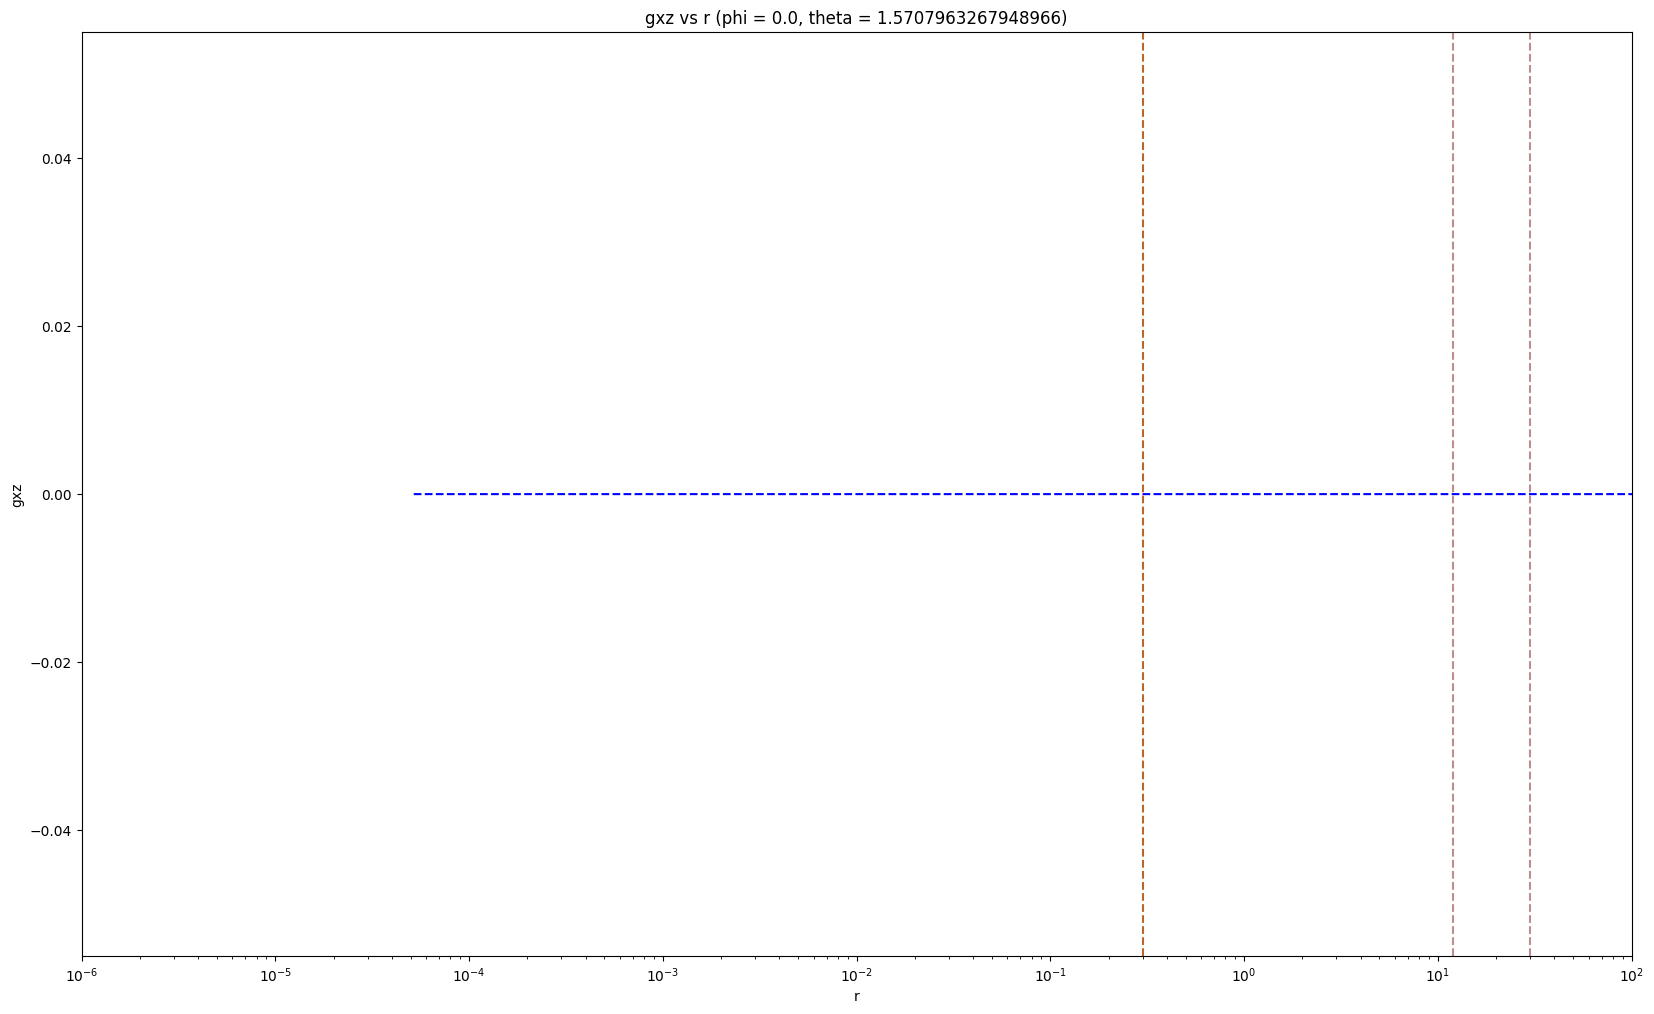

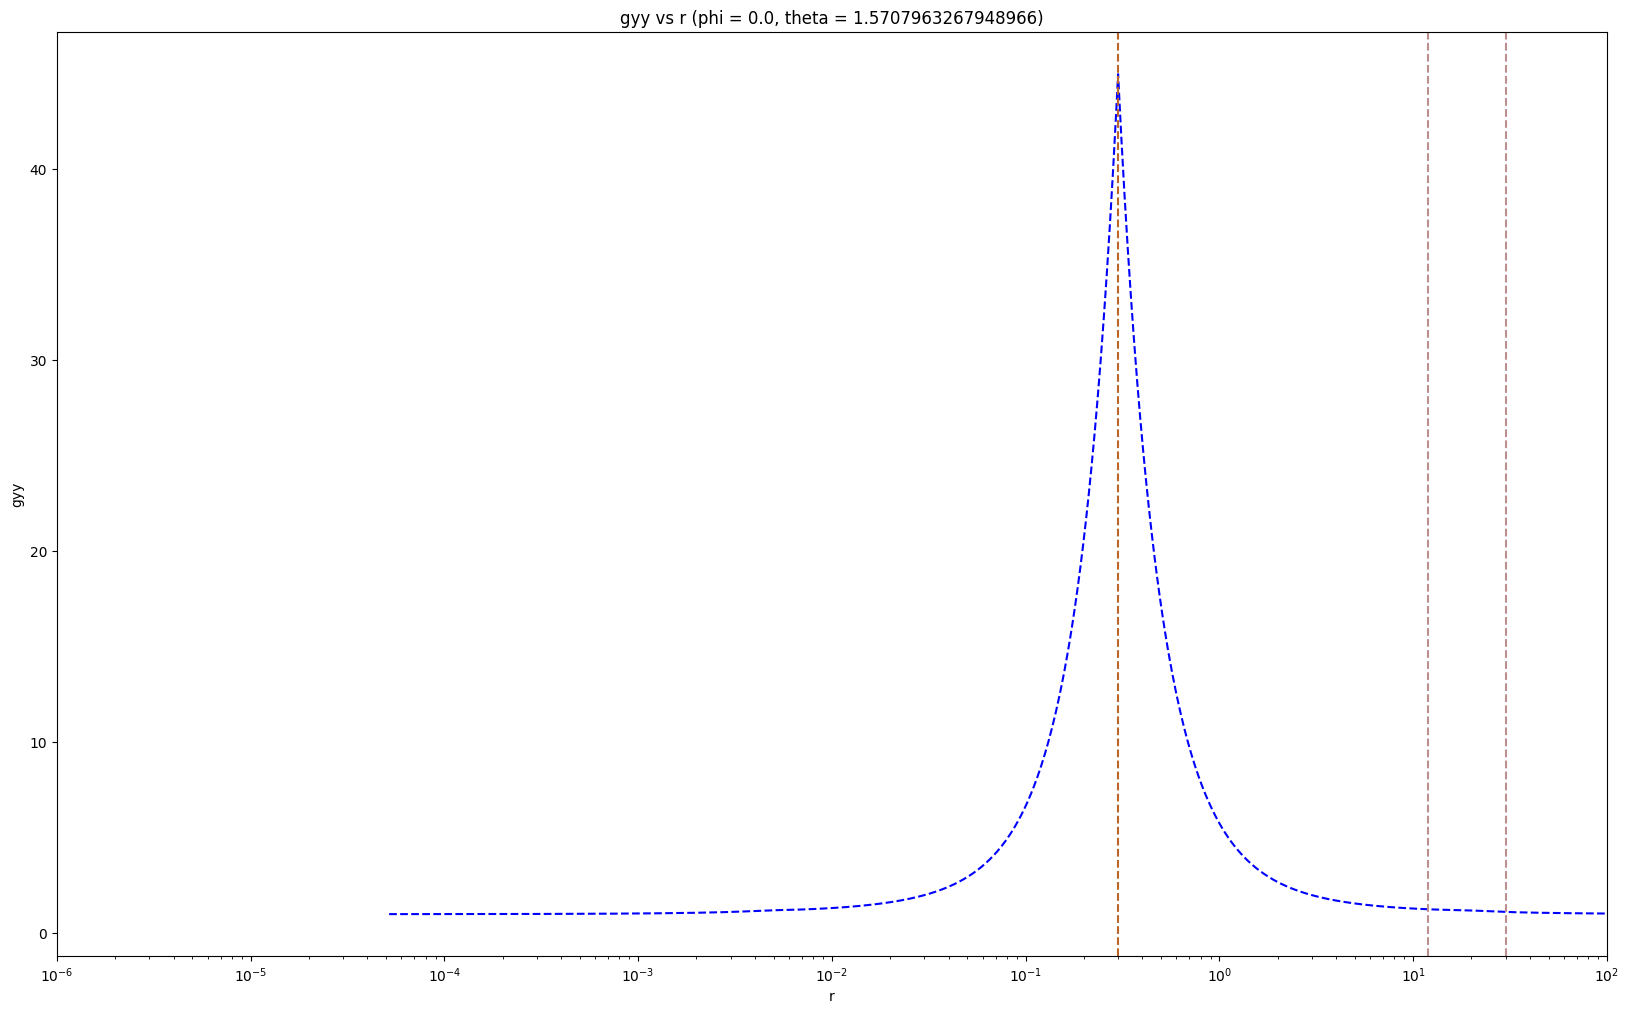

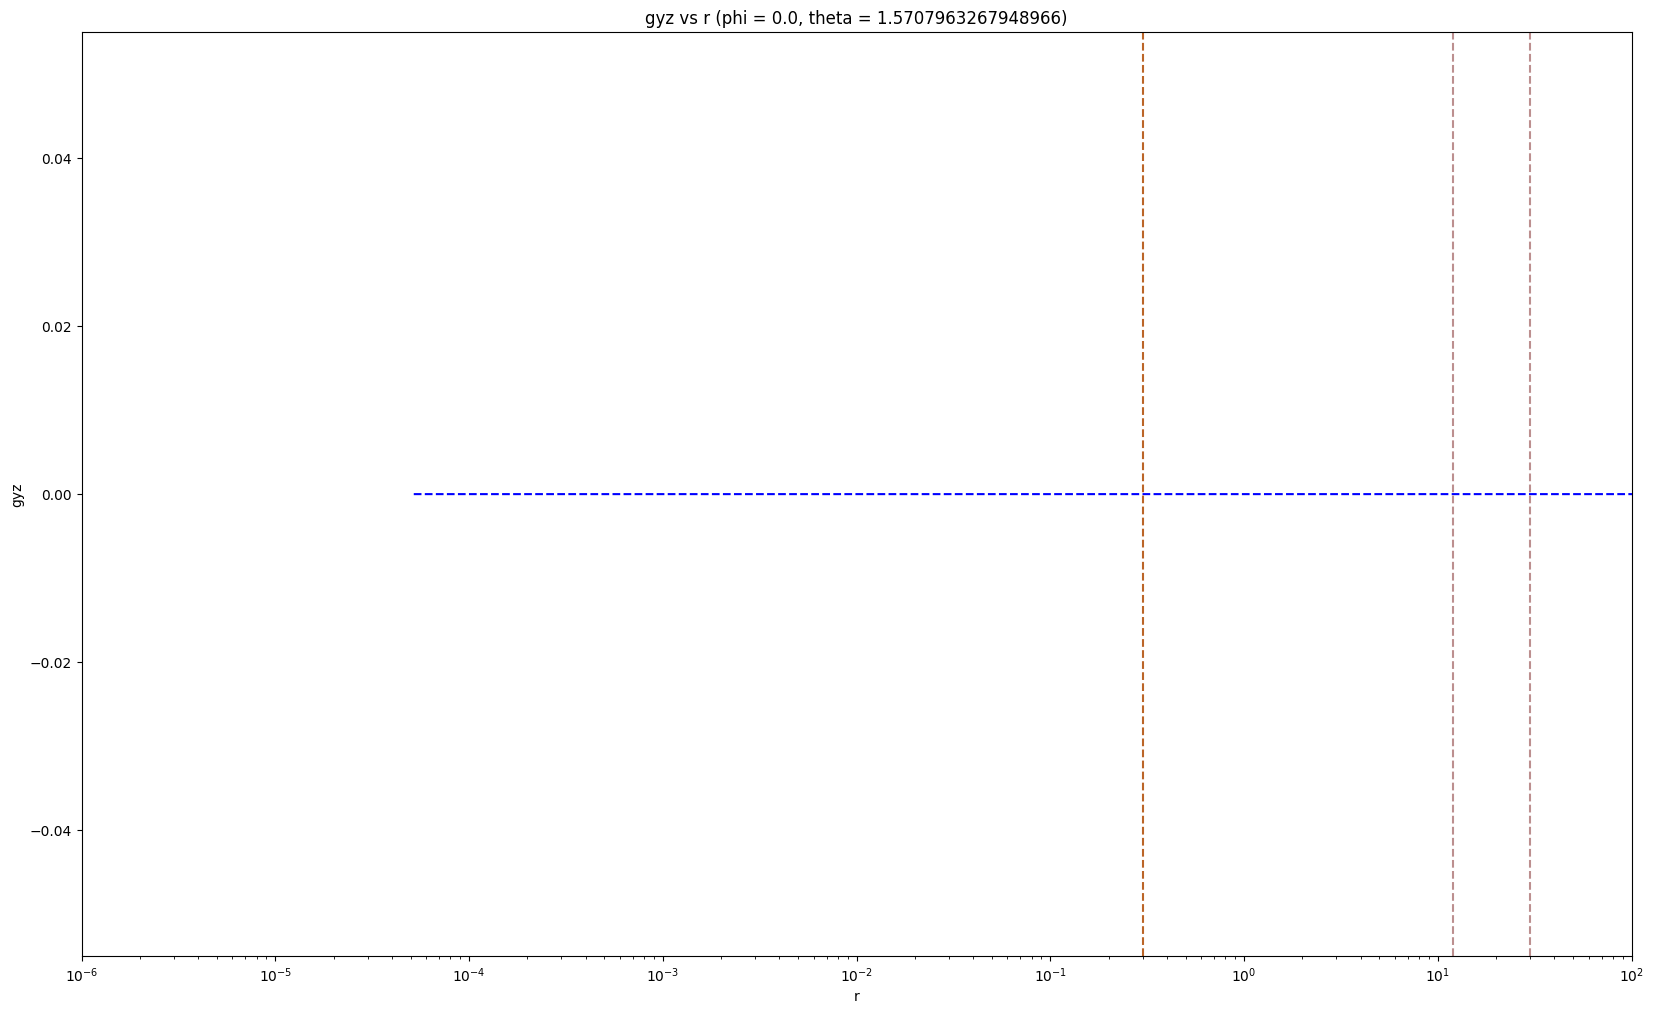

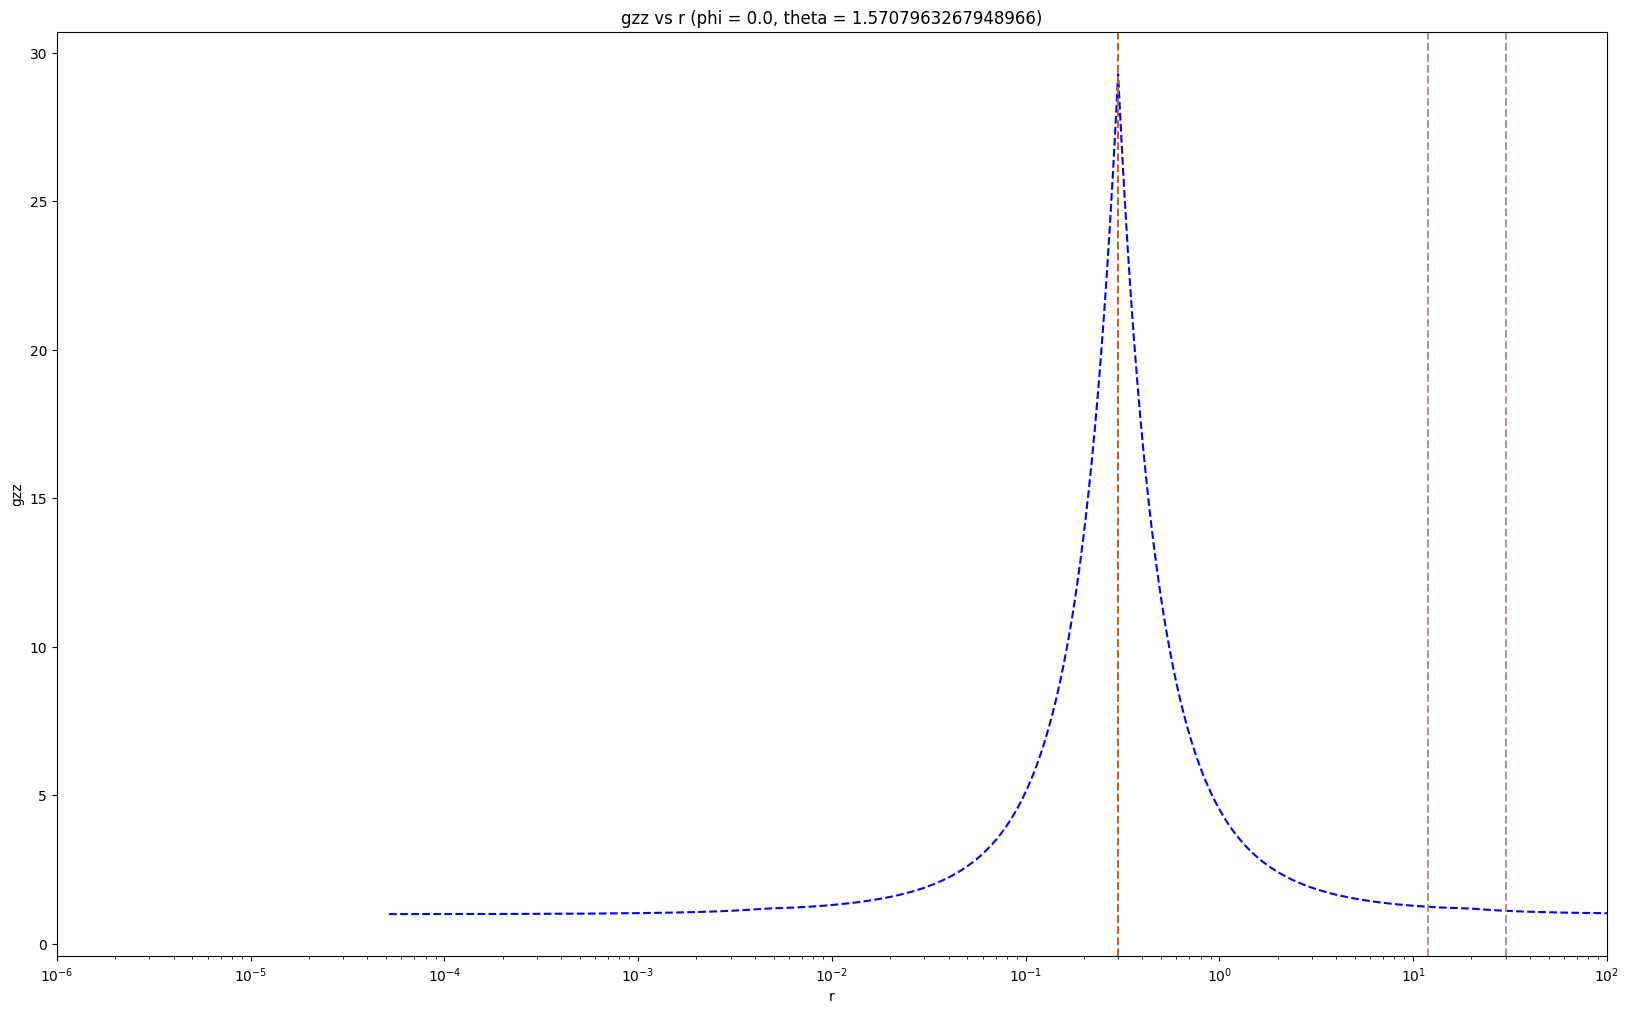

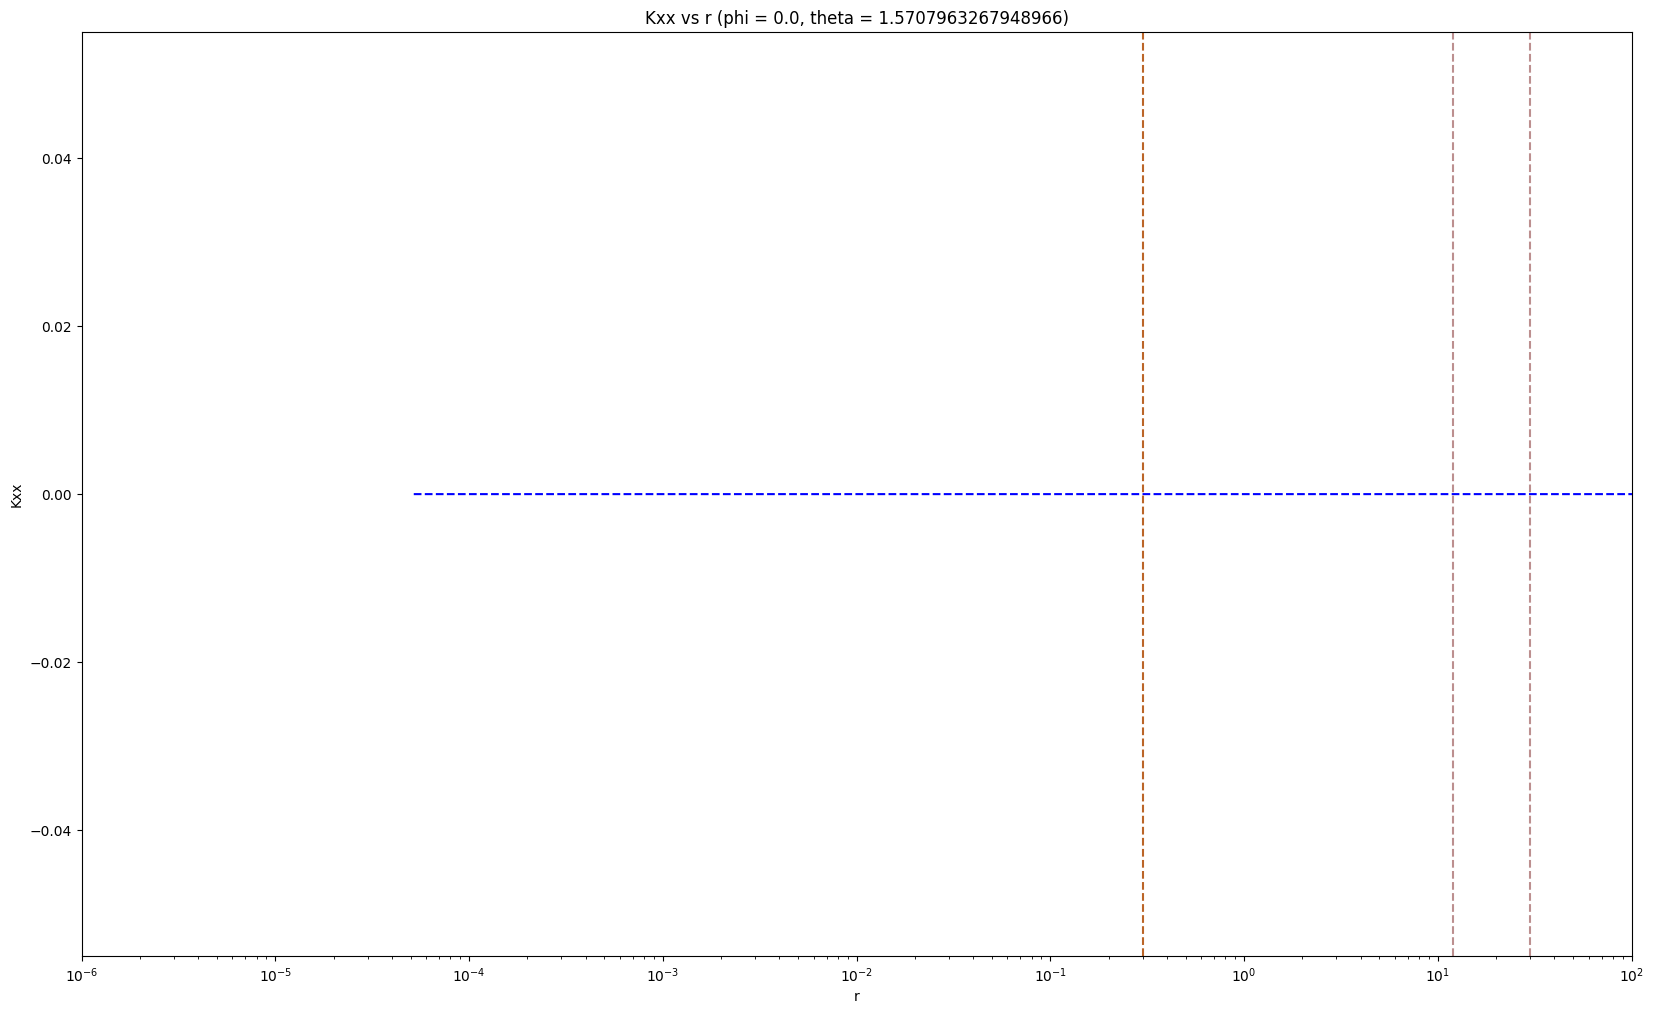

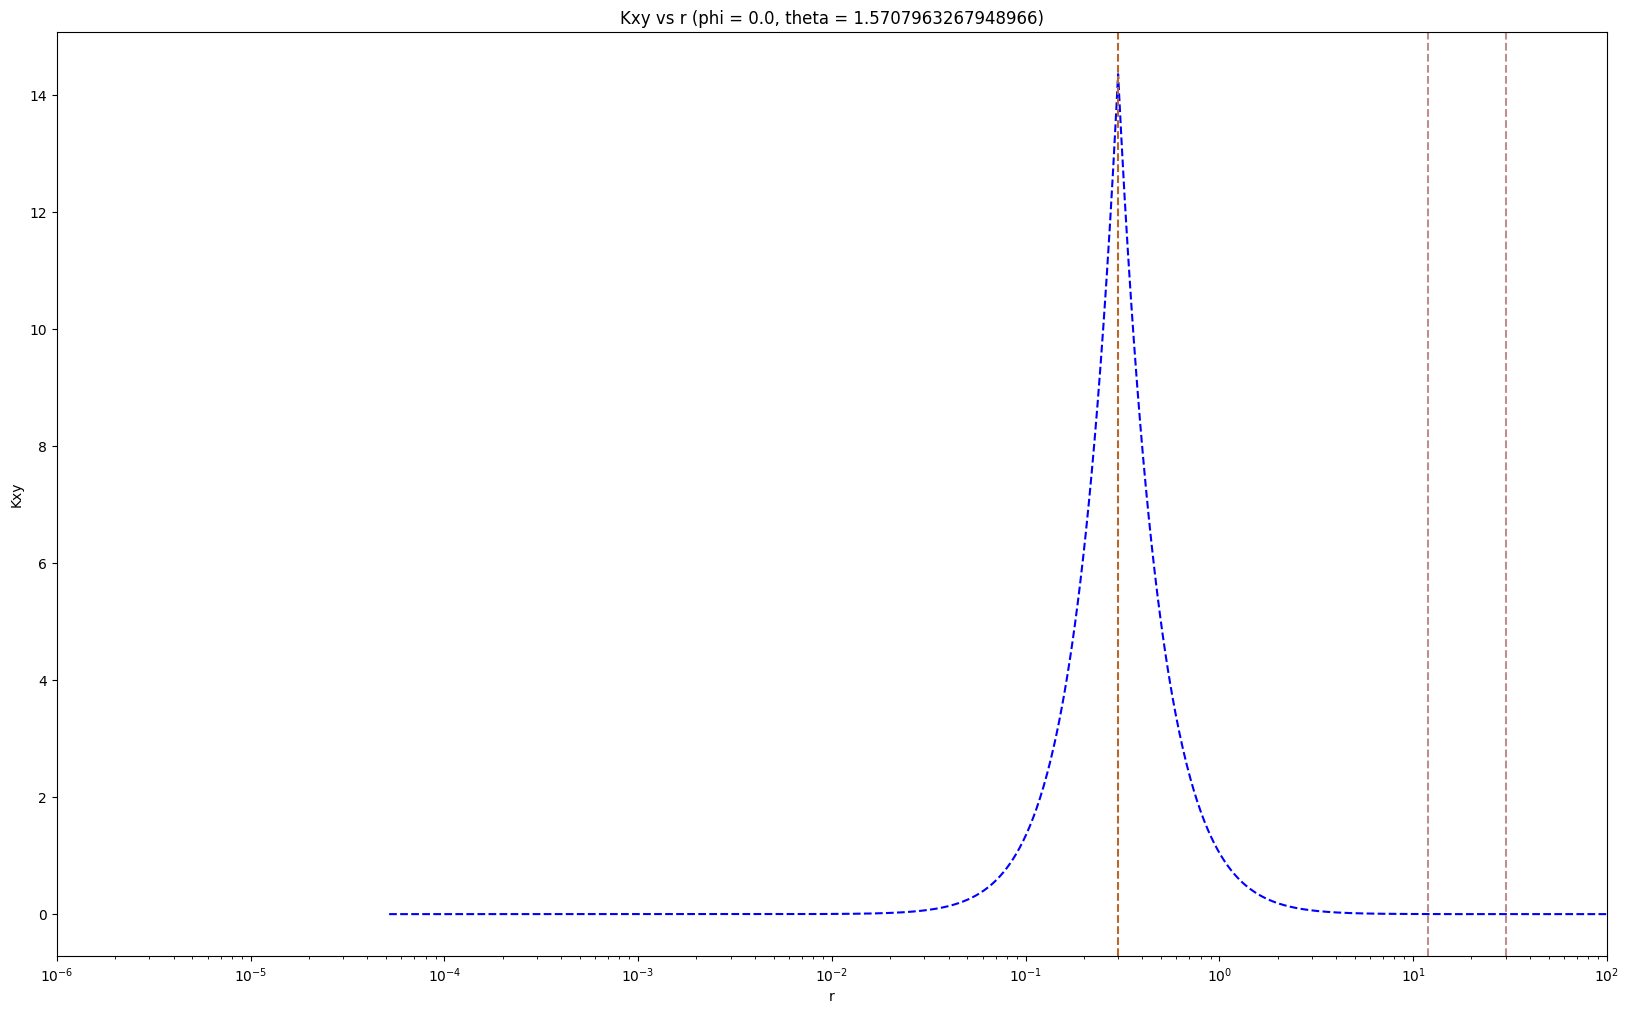

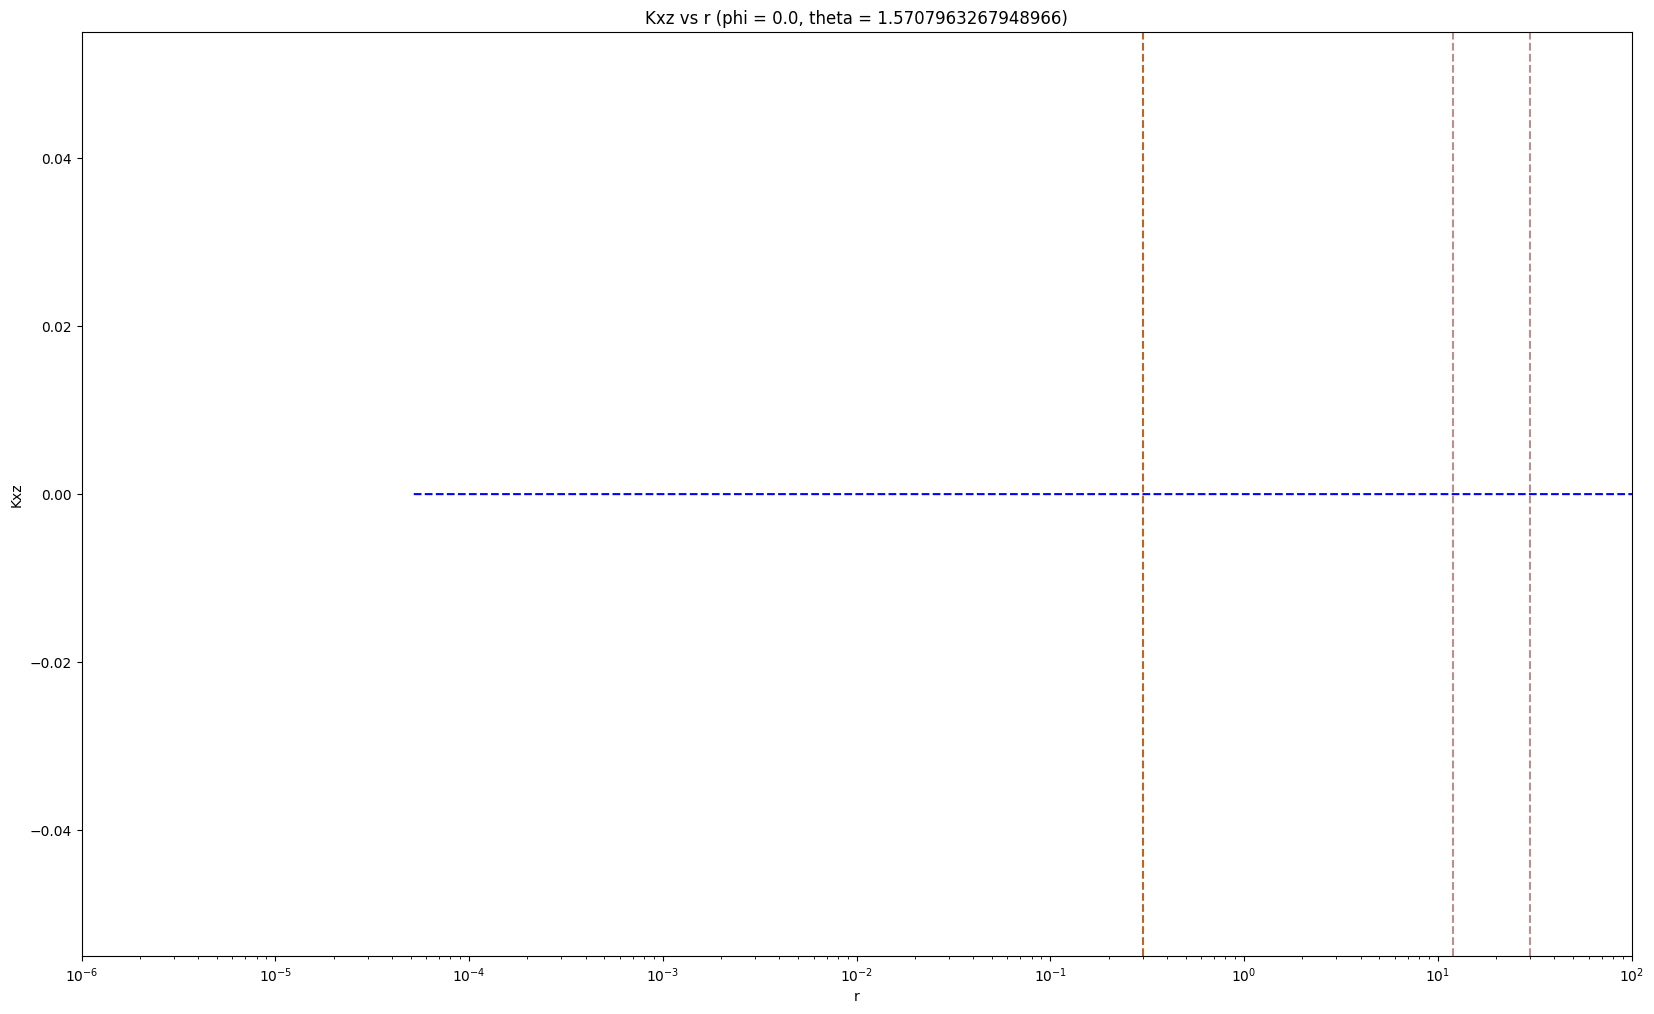

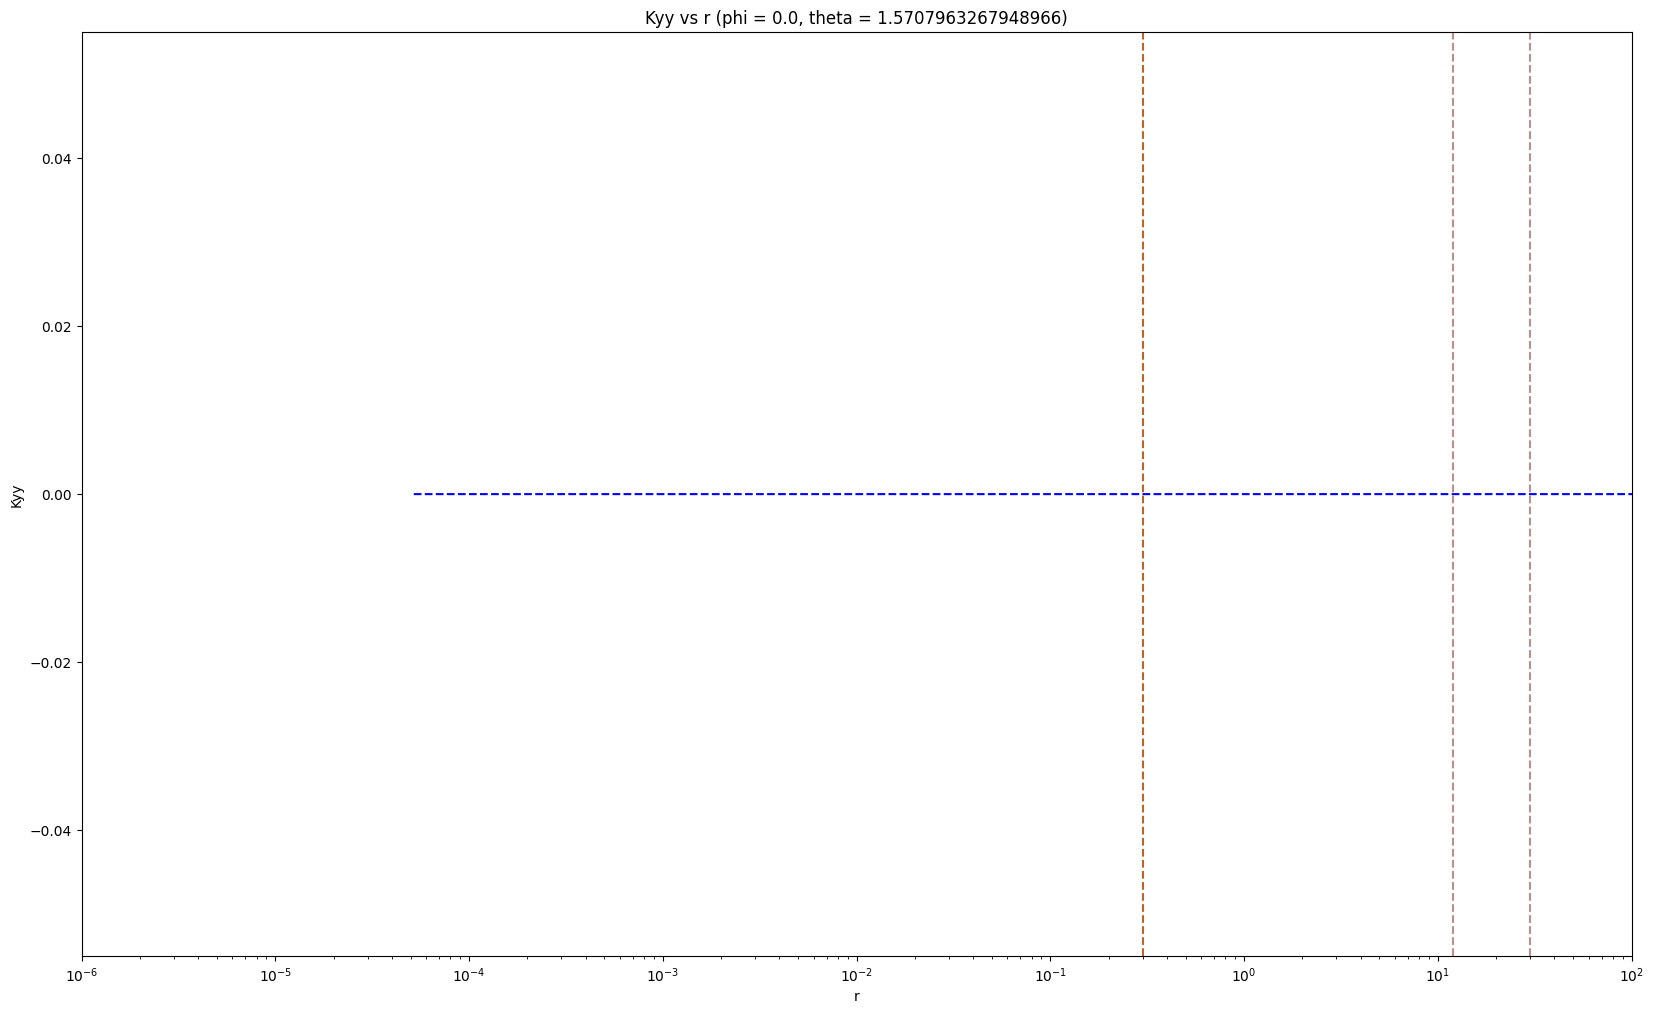

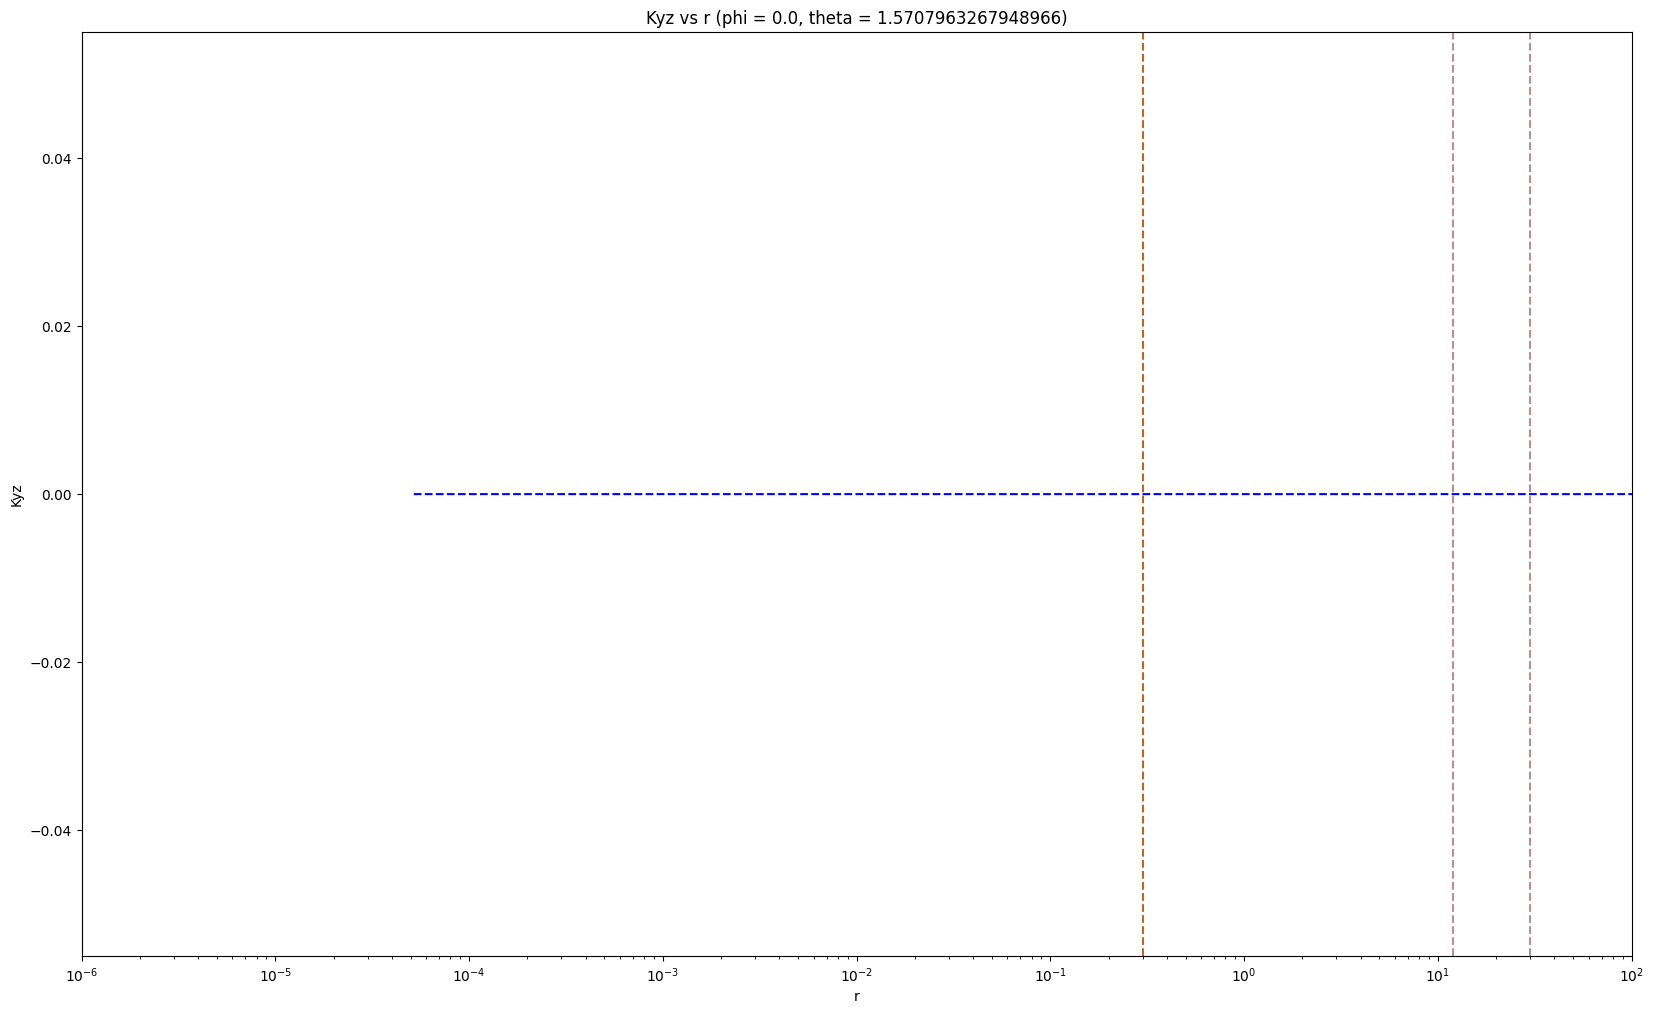

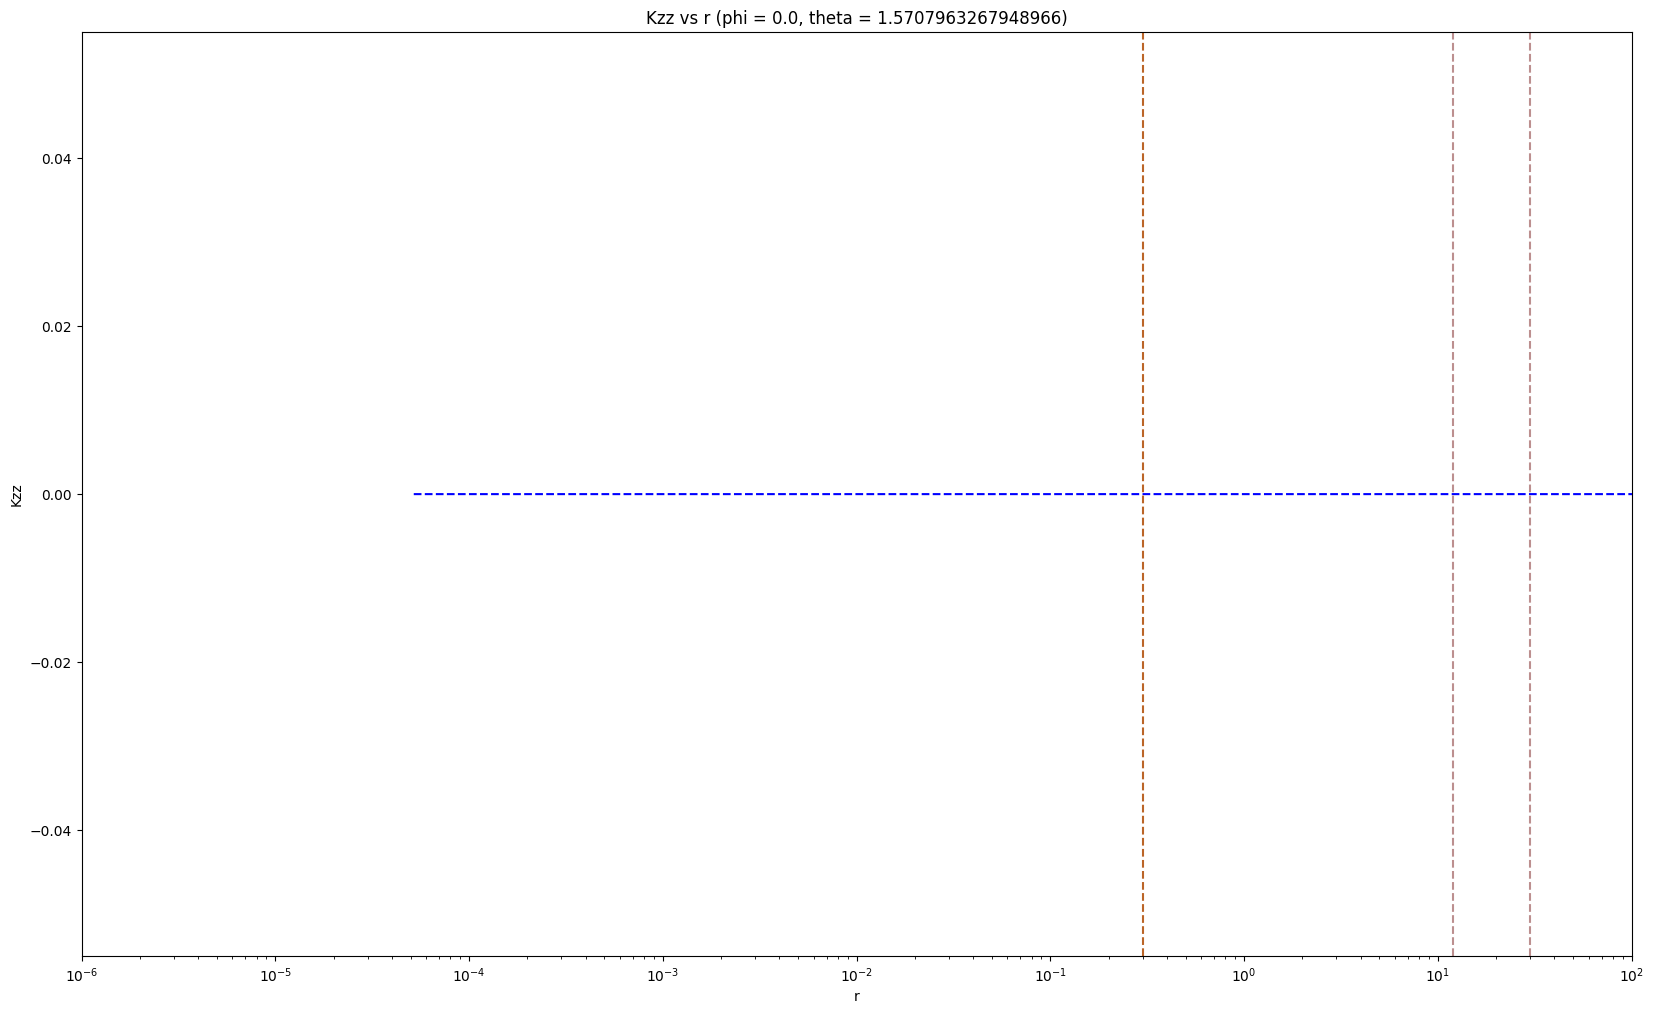

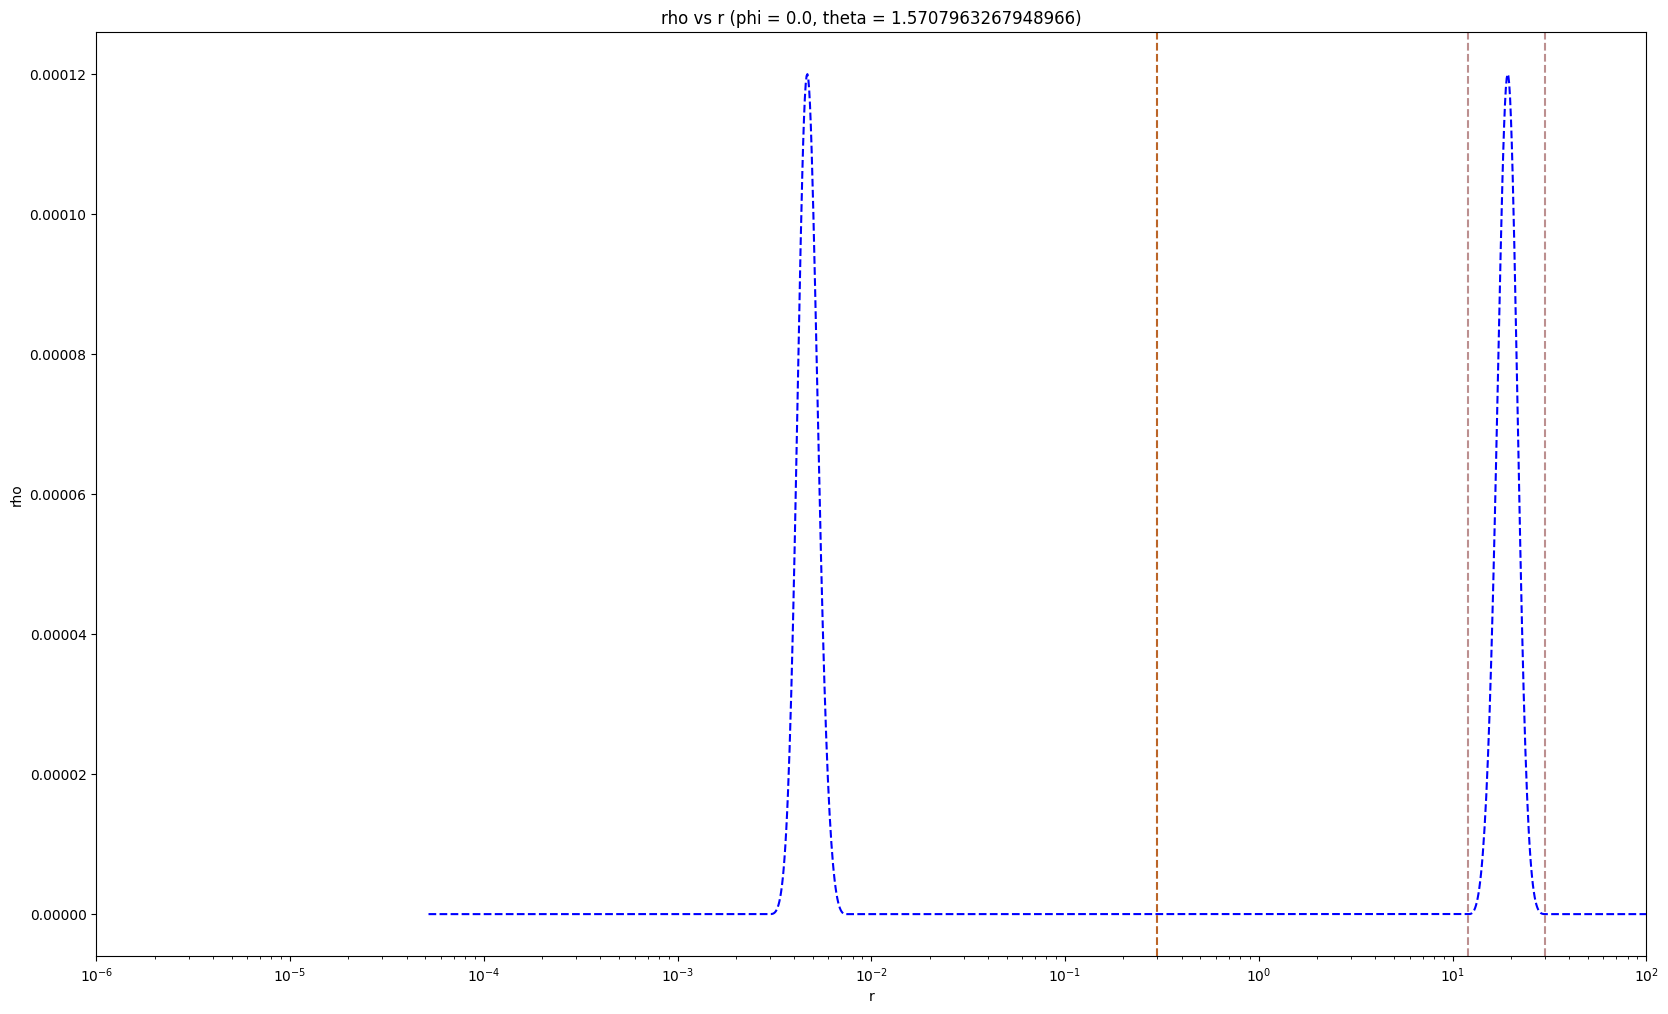

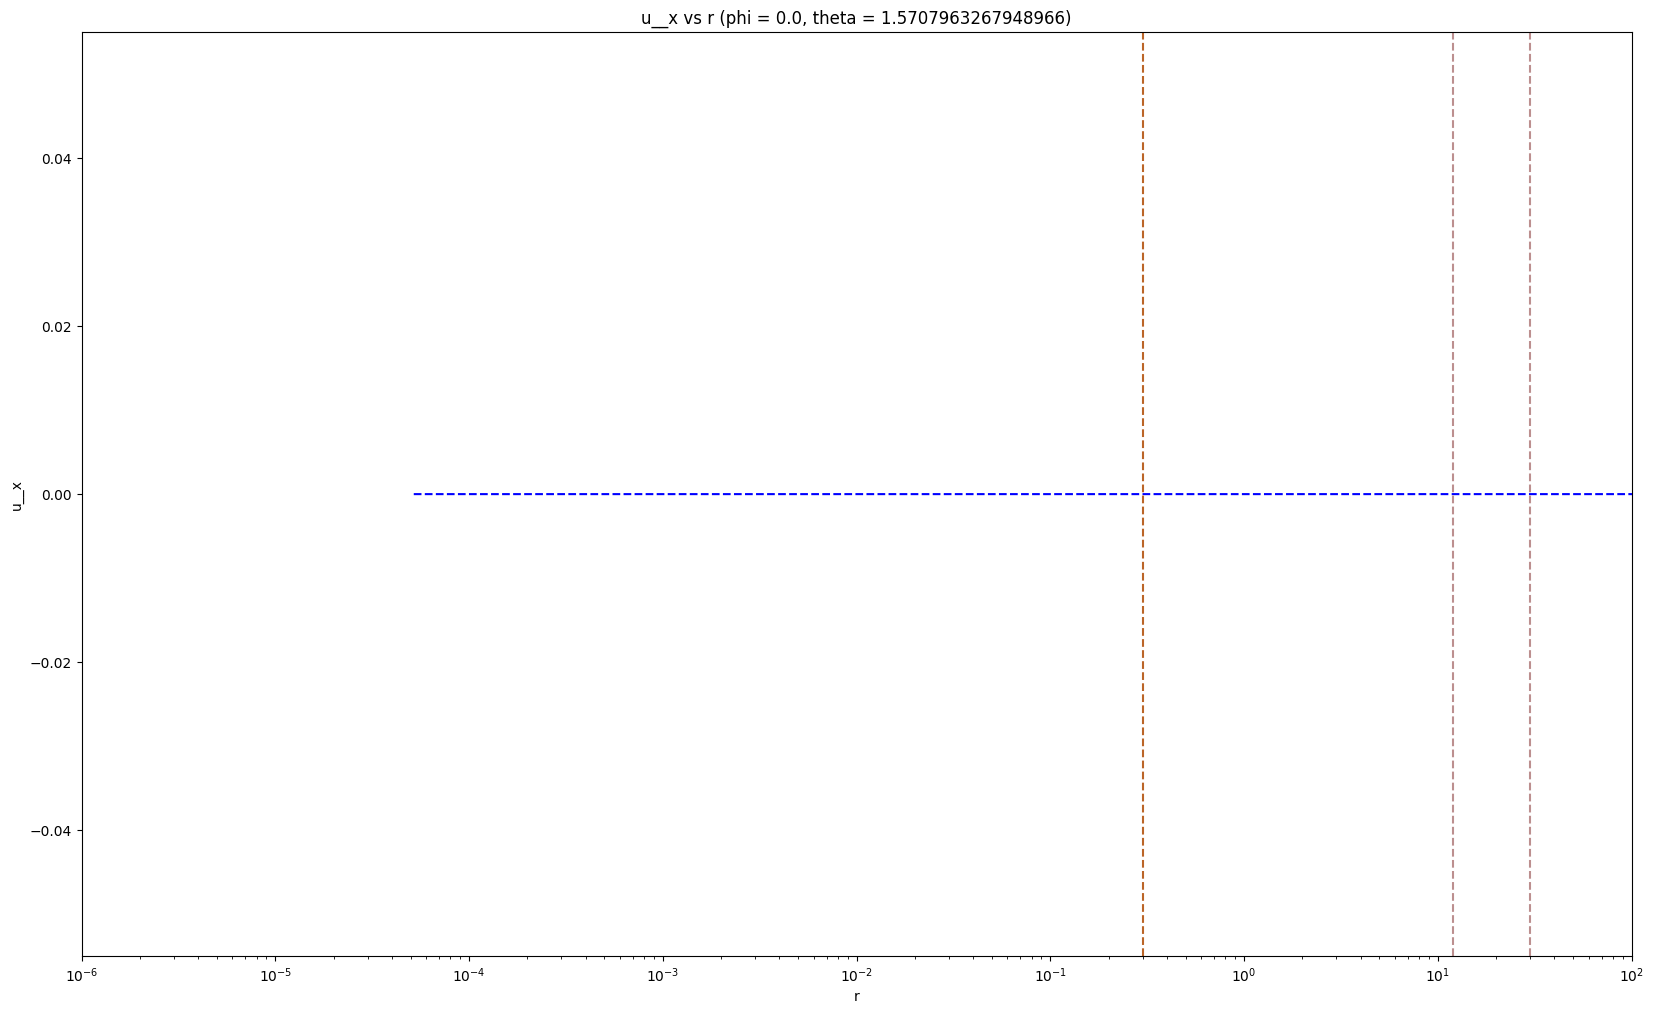

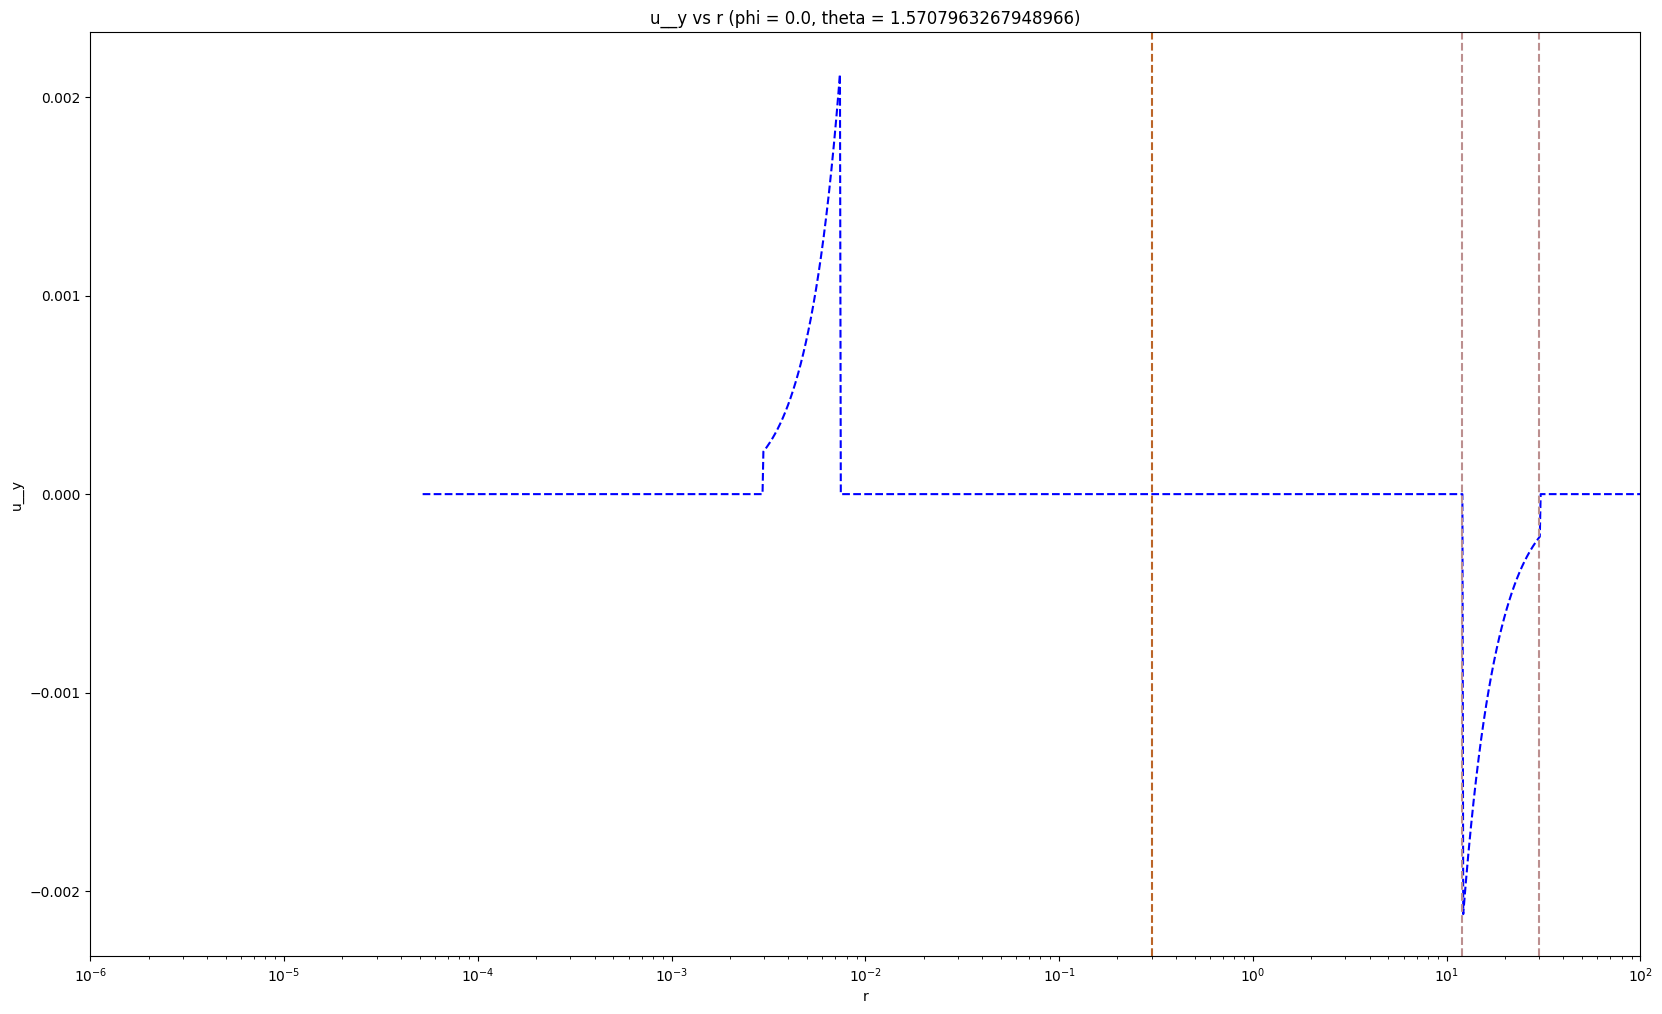

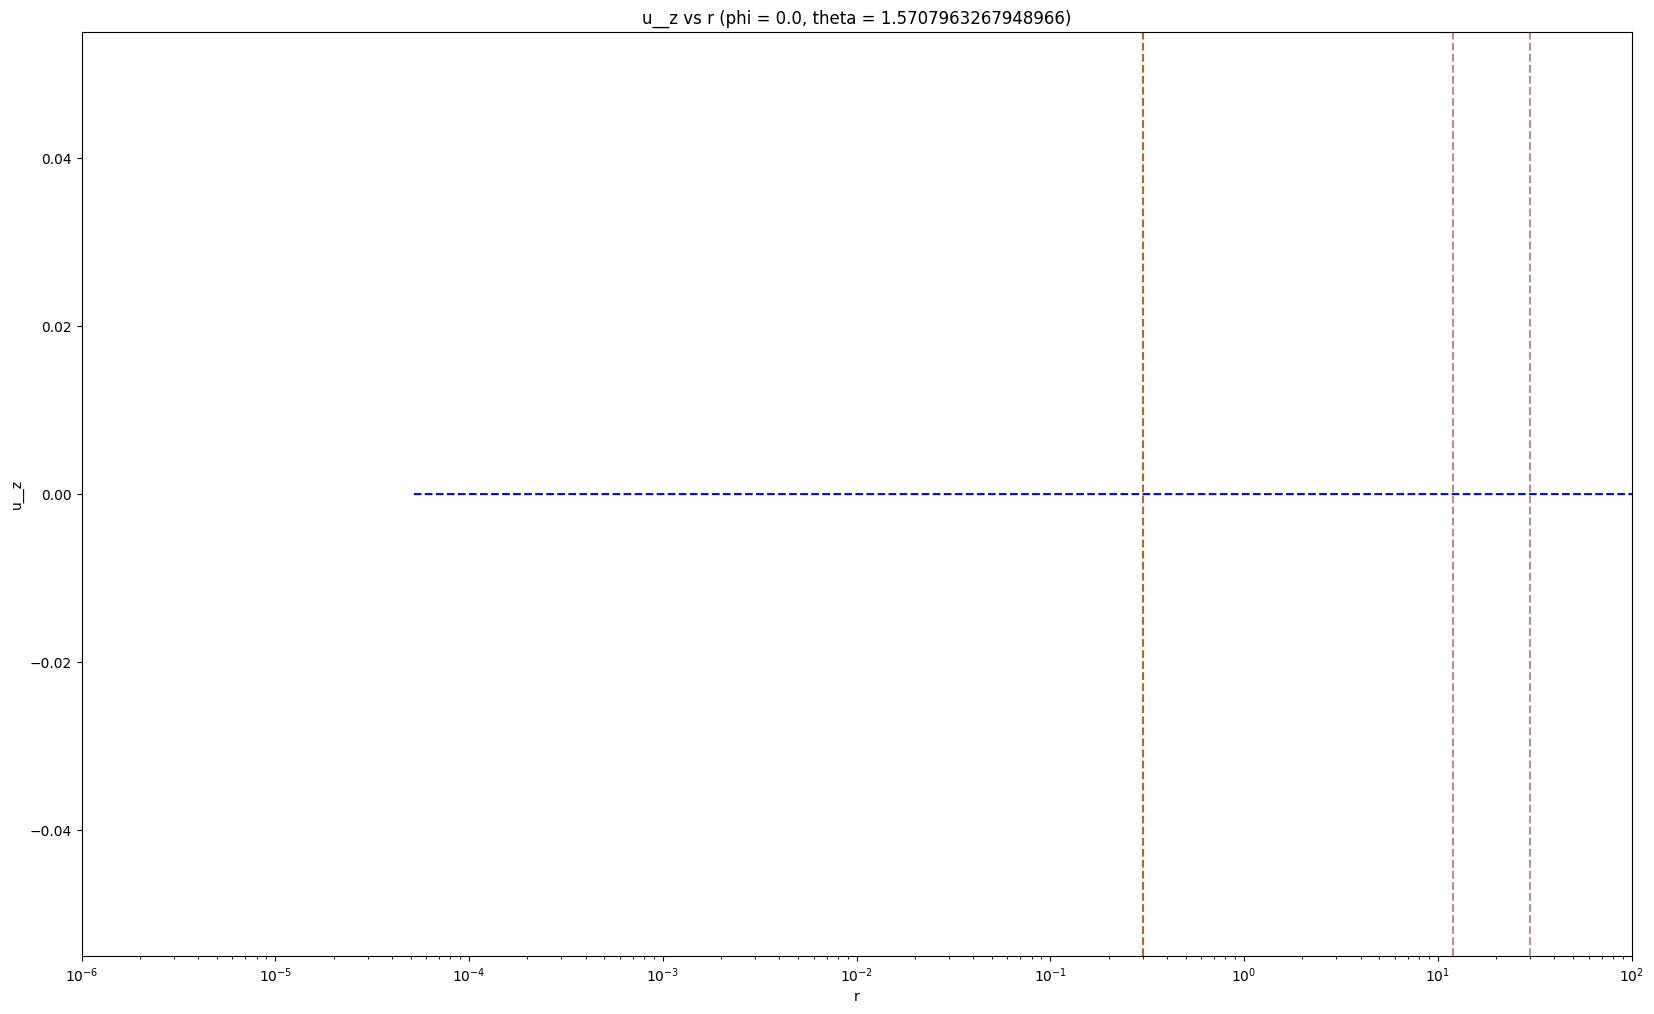

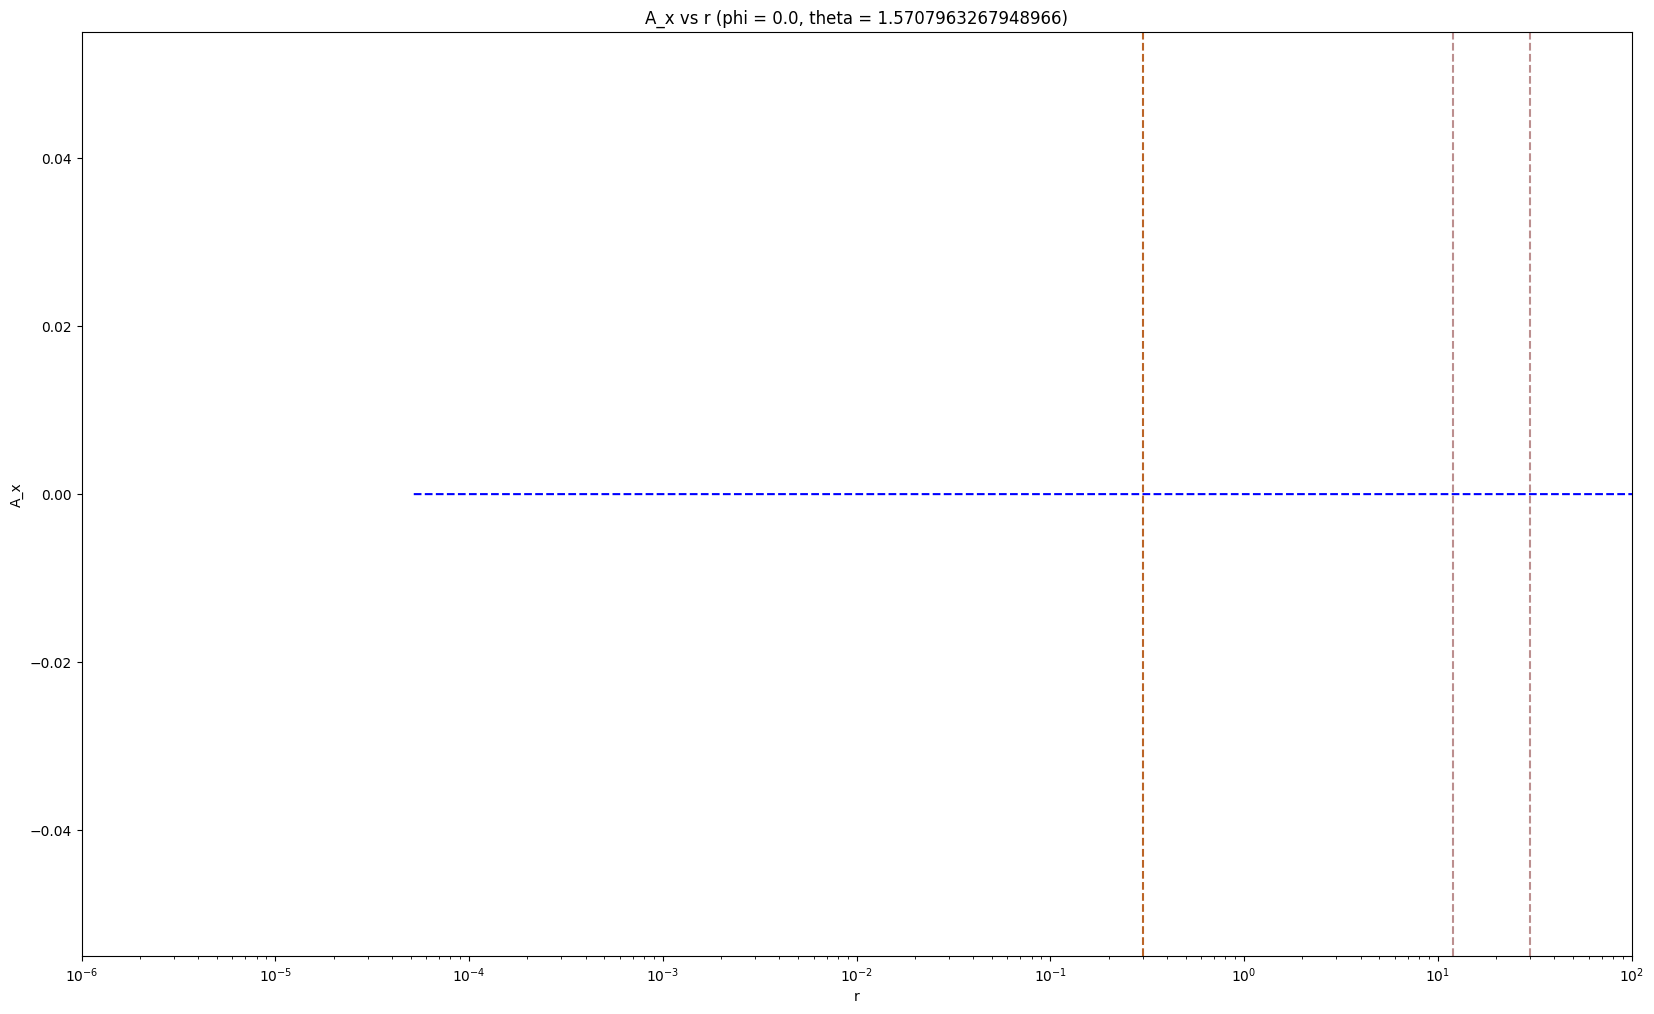

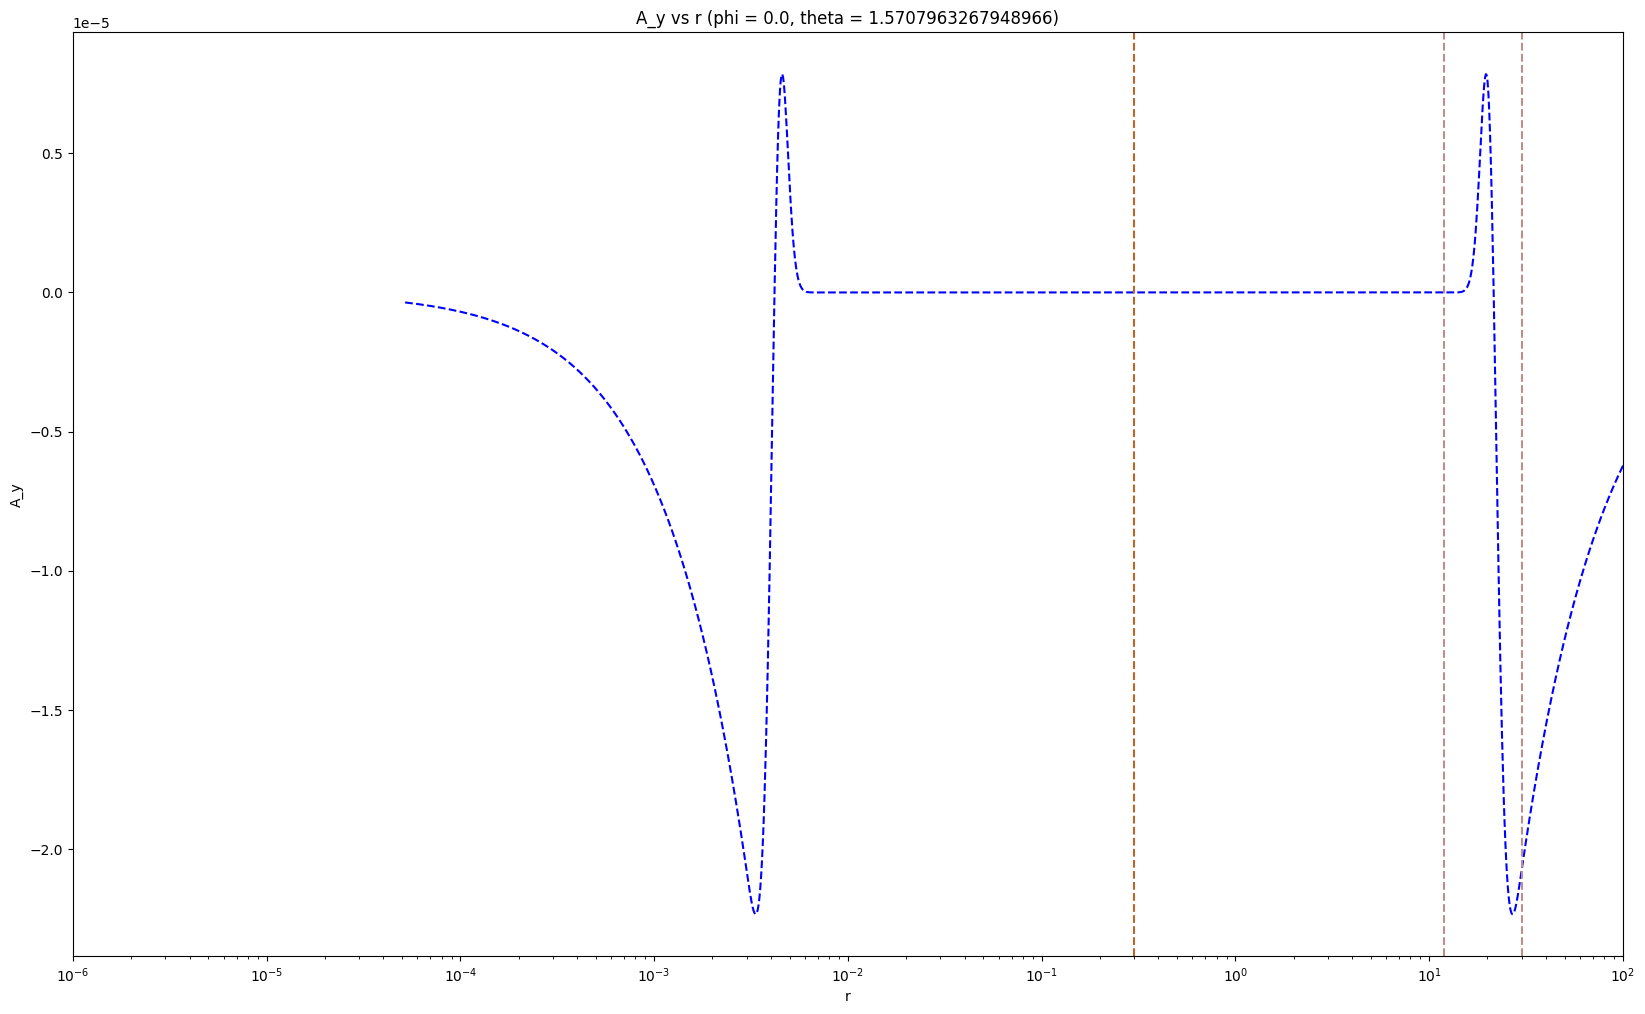

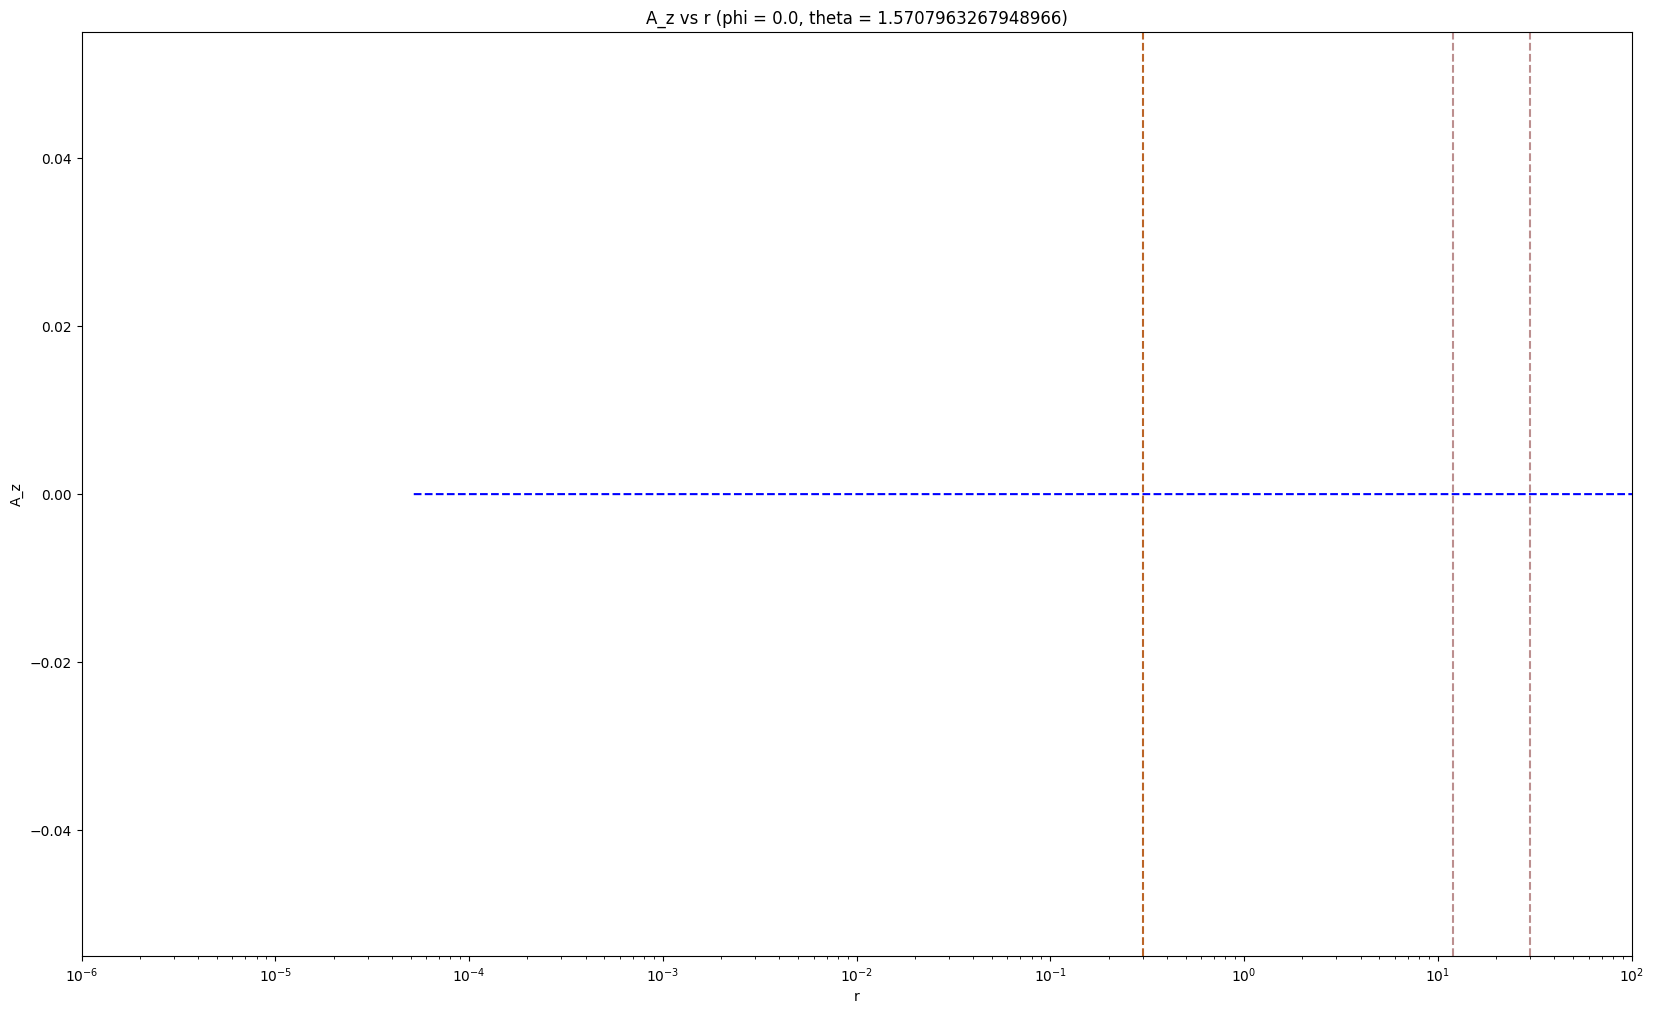

In [47]:
for col in list(df_3d.columns)[3:]:
    fig, ax = plt.subplots(figsize=(20,12))
    #plt.subplots_adjust(right=0.75)
    plt.xlim(1e-6, 100)
    plt.xscale('log')
    ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane[col], color='#644117', label="interpolated data")
    #ax.plot(df_2d_new_xplane["r"], df_2d_new_xplane[col], color='b', label="2d data")
    ax.plot(df_3d_new_xplane["r"], df_3d_new_xplane[col], linestyle="--", color='b')
    ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
    #ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane[col], color='#644117', linestyle=":", label="interpolated data")
    plt.xlabel("r")
    plt.ylabel(col)
    plt.title("{} vs r (phi = {}, theta = {})".format(col, df_3d_new_xplane.phi.unique()[0], df_3d_new_xplane.theta.unique()[0]))
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.savefig("r_vs_{}_3dv4.png".format(col))

    plt.show()